In [1]:
#! pip install translate
import pandas as pd, numpy as np, xlsxwriter, matplotlib.pyplot as plt, seaborn as sns, os, math, shutil
from datetime import datetime as dt, timedelta
from openpyxl import load_workbook
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from notifypy import Notify
notification = Notify()
from googletrans import Translator
import warnings
warnings.filterwarnings('ignore')
# Importing Google sheet library and autorising to access google sheets.
#import gspread
#gc = gspread.oauth()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("\n*****Required libraries imported*****")


*****Required libraries imported*****


# Mention project raw data filename & PID below

In [2]:
## Asking for project ID from the user
file_Name = input('Please enter file name = ')

# Asking for project ID from the user
PID = input('Please provide PID of project = ')

Please enter file name =  cases_report_Hyundai Foundation Phase2_(All States)_2026-01-06.csv
Please provide PID of project =  PID/HYUND1/2025/DI/YK/0530


In [3]:
def csvORexcel():
    global path
    path = "C:\\Python\\read\\"+file_Name
    try:
        if file_Name.split('.')[-1].startswith('c'):
            df = pd.read_csv(path)
            return df
        elif file_Name.split('.')[-1].startswith('x'):
            df = pd.read_excel(path, engine="openpyxl")
            return df
    except FileNotFoundError:
        print("The file name {0} has not found".format(path))

fn = file_Name

In [5]:
src = r"F:\HQ Google Drive\Other computers\My Dell Laptop\Haqdarshak Data\Downloads"
dest = "C:\\Python\\read\\"
if file_Name in os.listdir(src):
    shutil.move(os.path.join(src,file_Name),os.path.join(dest,file_Name))
exe_start = dt.now() # Recording execution start time89/*
data0 = csvORexcel() # Reading exce/csv file
init_file_size = round(os.path.getsize(path)/1000000,2) # Getting excel file size
#data0 = pd.read_excel(r'C:\Users\akash\Documents\Haqdarshak\Work\Nassscom\1.0\cases_report__1_Nasscom1_uniques_till_27_Feb.xlsx', "Unique DI Data")
data0.head()

,Case Id,Case Created On,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,Case Organization,Case District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD/Agent ID,HD Display Name,HD Reporting to Opsco Name,HDs Associated AMS ID
0,EP05ODZG,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Scheme/Document received,23-Dec-2025,23-Dec-2025,Not Suspected,MH - Hyundai Motor India Foundation - Phase 2 ...,PUNE,PN05ABV6,Sanjay Narayan Kajale,M,7.218392e+09,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0
1,EP05OE0C,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Scheme/Document received,23-Dec-2025,23-Dec-2025,Not Suspected,MH - Hyundai Motor India Foundation - Phase 2 ...,PUNE,PN05ABVQ,Jyoti Sanjay Kajale,F,9.823122e+09,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0
2,EP05OE2G,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Scheme/Document received,24-Dec-2025,24-Dec-2025,Not Suspected,MH - Hyundai Motor India Foundation - Phase 2 ...,PUNE,PN05ABVQ,Jyoti Sanjay Kajale,F,9.823122e+09,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0
3,EP05OFHB,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Scheme/Document received,24-Dec-2025,24-Dec-2025,Not Suspected,MH - Hyundai Motor India Foundation - Phase 2 ...,PUNE,PN05ABV6,Sanjay Narayan Kajale,M,7.218392e+09,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0
4,EP05OI9G,24-Dec-2025,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Docket submitted,29-Dec-2025,NaN,Not Suspected,MH - Hyundai Motor India Foundation - Phase 2 ...,PUNE,PN05AEPR,Ranjana Popat Bhalerao,F,7.218102e+09,60.0,MAVAL,Chikhalse,PG04Z3UV,Bhalerao,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0


In [6]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135573 entries, 0 to 135572
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Case Id                     135572 non-null  object 
 1   Case Created On             135572 non-null  object 
 2   Scheme/Doc                  135572 non-null  object 
 3   Scheme/Doc GUID             135572 non-null  object 
 4   Status                      135572 non-null  object 
 5   Docket Submitted Date       124202 non-null  object 
 6   Benefit received Date       116228 non-null  object 
 7   HD Suspected Cases          135572 non-null  object 
 8   Case Organization           135572 non-null  object 
 9   Case District               135572 non-null  object 
 10  Citizen GUID                135572 non-null  object 
 11  Citizen Name                135572 non-null  object 
 12  Gender                      135572 non-null  object 
 13  Mobile        

In [7]:
states = {'AP':'Andhra Pradesh',
'AR':'Arunachal Pradesh',
'AS':'Assam',
'BR':'Bihar',
'BH':'Bihar',
'CT':'Chhattisgarh',
'CG':'Chhattisgarh',
'DL':'Delhi',
'GA':'Goa',
'GJ':'Gujarat',
'HR':'Haryana',
'HP':'Himachal Pradesh',
'JH':'Jharkhand',
'KA':'Karnataka',
'KL':'Kerala',
'MP':'Madhya Pradesh',
'MH':'Maharashtra',
'MN':'Manipur',
'ML':'Meghalaya',
'MZ':'Mizoram',
'NL':'Nagaland',
'OR':'Odisha',
'PB':'Punjab',
'RJ':'Rajasthan',
'SK':'Sikkim',
'TN':'Tamil Nadu',
'TG':'Telangana',
'TR':'Tripura',
'UP':'Uttar Pradesh',
'UT':'Uttarakhand',
'WB':'West Bengal'}

# Data Cleaning & Transformation

In [8]:
# Defining a function to remove extra spaces between words.
def rem_space(x):
    try:
        n = x.strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.
    except AttributeError:
        n = str(x).strip(' ').split(' ') # Remove extra spaces from begining and end then splitting the name.

    name = '' # Decalring a empty name

    for w in n:
        if w != '': # This will execute if non empty word found
            if name == '': # This will run if "name" variable is empty
                name = w # Storing name into "name" variable.
            else: # This will run if "name" variable is not empty
                name = name + ' ' + w # Joining the names with single spaces.

    return name

In [9]:
data0.rename(columns={"Case Created On":"Createdon","HD/Agent ID":"HD ID","HD Display Name":"HD Name","HD Reporting to Opsco Name":"Opsco name","HDs Associated AMS ID":"AMS ID"}, inplace=True)

# Remove last row.
data0.drop(index = data0[data0["Createdon"].isna()].index, inplace=True)

# Replace null values
data0['Scheme/Doc'].fillna('a', inplace=True)
data0['Citizen Name'].fillna('a', inplace=True)
data0['HD ID'].fillna('blank', inplace=True)
data0.Mobile.fillna(0, inplace=True)

# Changing status values and keeping only "Open/Submit/BR"
data0['Status'] = data0['Status'].apply(lambda x: 'Open' if x == 'Data complete' else 'Submitted' if (x=='Docket submitted' or x=='Document ready') else "Benefit Received" if x=='Scheme/Document received' else x)

# Changing Case Organization values from state initials to full state name.
data0['Case Organization'] = data0['Case Organization'].apply(lambda x: states[x[:2]]+'-'+x.strip(' ')[-2:] if x.strip(' ')[-2:]=='LI' else states[x[:2]])

# Renaming column "Case Organiisation" & "Case District" to "State" & "Disctrict"
data0.rename(columns={"Case Organization":"State","Case District":"District"}, inplace=True)

# Filling missing values in "Citizen District" column with "Not Captured"
if 'Citizen District' in data0.columns:
    data0['Citizen District'].fillna('Not Captured', inplace=True)

# Removing extra spaces in Opsco name
data0['Opsco name'] = data0['Opsco name'].apply(lambda x: rem_space(x))

# Convert Mobile column from float to string for concatenation.
data0['Mobile'] = data0['Mobile'].apply(lambda x: str(x).strip())

# Defining a function to remove row based on invalid mobile number.
def ifNotNumber(x):
    data0.drop(data0[data0.Mobile==x].index, inplace=True)
    print("Row with mobile number {0} has removed!".format(x))

data0['Mobile'] = data0['Mobile'].apply(lambda x: ifNotNumber(x) if x.strip(".")[0].isnumeric() == False else x) # Remove rows with invalid mobile number

# Change gender from initial letter to full form.
data0['Gender'] = data0['Gender'].apply(lambda x: 'Male' if x=='M' else 'Female' if x=='F' else 'Other' if x=='O' else x)

# Adding a boolean column to identify if citizen opted for YC & MSME YC
YC_citizens = data0[(data0['Scheme/Doc GUID']=='SH0009RR') & (data0['Status']=='Benefit Received')]['Citizen GUID'].to_list()
data0['isYC'] = data0['Citizen GUID'].apply(lambda x: 'Yes' if x in YC_citizens else 'No')
if 'SH000DYR' in set(data0['Scheme/Doc GUID']):
    MSMEYC_citizens = data0[(data0['Scheme/Doc GUID']=='SH000DYR') & (data0['Status']=='Benefit Received')]['Citizen GUID'].to_list()
    data0['isMSMEYC'] = data0['Citizen GUID'].apply(lambda x: 'Yes' if x in MSMEYC_citizens else 'No')

# Convert "Createdon", "Docket Submitted Date", "Benefit received Date" column data type to Datetime format
dt_col = ['Createdon', 'Createdon.1', 'Docket Submitted Date', 'Benefit received Date', 'DOB']

for col in dt_col:
    try:
        data0[col] = pd.to_datetime(data0[col], format='mixed', errors='ignore')
        #data0[col] = data0[col].apply(lambda x: x.strftime('%d-%m-%Y') if type(x) != pd._libs.tslibs.nattype.NaTType else x)
    except KeyError:
        continue

# Deleting records with status "Case Aborted" and "Application rejected"
rejectedDF = data0[(data0.Status == 'Case Aborted') | (data0.Status == 'Application rejected')] # Storing prev step deleted data
data0 = data0[(data0['Status'] != 'Case Aborted') & (data0['Status'] != 'Application rejected')]

data0.reset_index(inplace=True, drop=True)
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134283 entries, 0 to 134282
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Case Id                134282 non-null  object 
 1   Createdon              134283 non-null  object 
 2   Scheme/Doc             134283 non-null  object 
 3   Scheme/Doc GUID        134283 non-null  object 
 4   Status                 134283 non-null  object 
 5   Docket Submitted Date  123747 non-null  object 
 6   Benefit received Date  116170 non-null  object 
 7   HD Suspected Cases     134283 non-null  object 
 8   State                  134283 non-null  object 
 9   District               134283 non-null  object 
 10  Citizen GUID           134283 non-null  object 
 11  Citizen Name           134283 non-null  object 
 12  Gender                 134283 non-null  object 
 13  Mobile                 134283 non-null  object 
 14  Age                    134283 non-nu

# Translate local language district name to English

### Custom translator

In [10]:
def Trans(x):
    t = Translator()
    attempt = 0
    max_attempts = 5
    alph = [chr(i) for i in range(65,122)]

    while attempt < max_attempts:
        if x[0] not in alph:
            try:
                xlated = t.translate(x)
                return xlated.text
            except AttributeError as e:
                if 'raise_Exception' in str(e):
                    print(f"Encountered rate limit error, attempt {attempt+1}/{max_attempts}. Retrying in 8 seconds...")
                    time.sleep(8)
                    attempt += 1
                else:
                    raise
            except Exception as e:
                print(e)
                break
            return "Failed to translate after multiple attempts."
        else:
            return x.title()

# Fnction to to create a dictionary for mapping correct district names.
def distName(column):
    dist = {}

    for d in column.value_counts().index:
        if d in [np.nan]:
            dist[d] = d
        elif d in dist.keys():
            break
        else:
            dist[d] = Trans(d)

    return dist

In [11]:
# Renaming Case District name from local language to english

dist = distName(data0['District'])
data0['District'] = data0['District'].apply(lambda x: "Dohad" if x=="દોહદ" else "Haridwar" if x=="हरिद्वार" else "UDHAM SINGH NAGAR".title() if (x=="उदम सिंह नगर" or x=="Udam Singh Nagar" or x=="UDAM SINGH NAGAR")
                             else "Sitamarhi" if x=="सीतामढ़ी" else "Mahasamund" if (x=="महासमुंद" or x=="Mahasamand")
                             else "Rajgarh" if x=="राजगढ़" else "Muzaffarpur" if x=="मुजफ्फरपुर" else "Nawada" if x=="नवादा" else "Balrampur" if x=="बलरामपुर"
                             else "DAMOH".title() if x=="दमोह" else "Shravasti" if x=="श्रावस्ती" else "NARMADA".title() if x=="નર્મદા" else "Chhatarpur" if (x=="छतरपुर" or x=="Chhattarpur")
                             else 'East Singhbum' if x=='ईस्ट सिंघबम' else 'Chhindwara' if x=='छिंदवारा' else 'Jalna' if x=='जालना' else 'Dhule' if x=='धुळे' else "Dhanbad" if x=="धनबाद"
                             else 'Banas Kantha' if x=='બનાસ કાંઠા' else 'Dhamtari' if x=='धमतरी' else 'Bilaspur' if x=='बिलासपुर' else dist[x])

if "Citizen District" in data0.columns:
    dist = distName(data0['Citizen District'])
    data0['Citizen District'] = data0['Citizen District'].apply(lambda x: "Dohad" if x=="દોહદ" else "Haridwar" if x=="हरिद्वार" else "UDHAM SINGH NAGAR".title() if (x=="उदम सिंह नगर" or x=="Udam Singh Nagar" or x=="UDAM SINGH NAGAR")
                                                                else "Sitamarhi" if x=="सीतामढ़ी" else "Mahasamund" if (x=="महासमुंद" or x=="Mahasamand")
                                                                else "Rajgarh" if x=="राजगढ़" else "Muzaffarpur" if x=="मुजफ्फरपुर" else "Nawada" if x=="नवादा" else "Balrampur" if x=="बलरामपुर"
                                                                else "DAMOH".title() if x=="दमोह" else "Shravasti" if x=="श्रावस्ती" else "NARMADA".title() if x=="નર્મદા" else "Chhatarpur" if (x=="छतरपुर" or x=="Chhattarpur")
                                                                else 'East Singhbum' if x=='ईस्ट सिंघबम' else 'Chhindwara' if x=='छिंदवारा' else 'Jalna' if x=='जालना' else 'Dhule' if x=='धुळे' else "Dhanbad" if x=="धनबाद"
                                                                else 'Banas Kantha' if x=='બનાસ કાંઠા' else 'Dhamtari' if x=='धमतरी' else 'Bilaspur' if x=='बिलासपुर' else dist[x])

data0['District'].value_counts()

Pune                 42461
Gurugram             27956
Nuh                  27703
Faridabad            13481
South West            5539
Nashik                5459
Haridwar              3344
North                 2902
South                 2265
Pithoragarh            732
South East             387
Mirzapur               356
Indore                 321
Udham Singh Nagar      250
Chhindwara             214
Bahraich               187
Jhansi                 179
Bhopal                 130
Lucknow                124
Kendujhar               78
Varanasi                58
West                    54
Jalgaon                 46
Dhanbad                 34
New Delhi               12
Palwal                  10
Rewari                   1
Name: District, dtype: int64

# Mention orgwise scheme applied raw data filename below

In [12]:
file_Name = 'orgwise_schemes_applied.xlsx'

In [14]:
# Importing Schemes data from Orgwise schemes applied report
schemeDetails = csvORexcel() # Reading the excel file
schemeDetails = schemeDetails[schemeDetails['Project Id'] == PID] # Filtering data based on Project ID.
#schemeDetails = schemeDetails[~schemeDetails['Parent Scheme GUID'].isna()]
schemeDetails["Parent Scheme GUID"] = schemeDetails[["Parent Scheme GUID","Scheme Id"]].apply(lambda x: x[1] if x[0] in [np.nan] else x[0], axis=1) # Filling missing values in Parent Scheme ID with Child Scheme Id
schemeDetails["Parent Scheme"] = schemeDetails[["Parent Scheme","Scheme Name"]].apply(lambda x: x[1] if x[0] in [np.nan] else x[0], axis=1) # Filling missing values in Parent Scheme with Child Scheme Name
schemeDetails['Org Name'] = schemeDetails['Org Name'].apply(lambda x: states[x[:2]]+'-'+x[-2:] if x[-2:]=='LI' else states[x[:2]]) # Updating org name with state name
schemeDetails.head()

,State,Org Name,Project Id,Scheme Id,status,Parent Scheme GUID,Parent Scheme,Scheme Name,Scheme type,Fee,Timeline,Benefit Value,Open,Submitted,Received
0,Odisha,Odisha,PID/HYUND1/2025/DI/YK/0530,SH0009SW,True,PSH000DAH,Short Training on Digital & Financial Inclusion,Short Training on Digital & Financial Inclusio...,sch,0.0,14,5000,69.0,30.0,28.0
1,Odisha,Odisha,PID/HYUND1/2025/DI/YK/0530,DC0000YS,True,PDC0009KX,Voter ID,Voter ID (Central),doc,0.0,30,100,1.0,1.0,NaN
2,Odisha,Odisha,PID/HYUND1/2025/DI/YK/0530,SH000A4R,True,PSH000B31,Update in Voter Id,Updation/Correction in Voter ID (Central),doc,0.0,30,50,8.0,8.0,NaN
23,Jharkhand,Jharkhand,PID/HYUND1/2025/DI/YK/0530,SH0009RR,True,PSH0009SG,Yojana Card,Loyalty Yojana Card,sch,85.0,NaN,50,19.0,19.0,19.0
24,Jharkhand,Jharkhand,PID/HYUND1/2025/DI/YK/0530,SH000DRB,True,SH000DRB,Mukhyamantri Abua Swasthya Suraksha Yojana_JH,Mukhyamantri Abua Swasthya Suraksha Yojana_JH,sch,20.0,1 day,74243,4.0,NaN,NaN


In [15]:
data0['stSchCon'] = data0['State']+data0['Scheme/Doc GUID'] # Adding a concanetaed column for state and scheme ID
schemeDetails['stSchCon'] = schemeDetails['Org Name']+schemeDetails['Scheme Id'] # Adding a concanetaed column for state and scheme ID

# Removing colomuns except 'Scheme Id','Scheme type','Benefit Value' to merge with main dataframe
for s in schemeDetails.columns:
    if s not in ['Scheme type','Benefit Value','Parent Scheme','stSchCon']:
        schemeDetails.drop(columns=s, inplace=True)

# Merging scheme details with main dataframe to get data of Scheme type & Benefit Value.
data0 = data0.merge(schemeDetails.drop_duplicates(subset=['stSchCon'], keep='last'), left_on='stSchCon', right_on="stSchCon", how='left')

# Removing non required column "Scheme ID"
data0.drop(columns = 'stSchCon', inplace=True)

# Changing short form to "Scheme" & "Document"
data0['Scheme type'] = data0['Scheme type'].apply(lambda x: 'Scheme' if x=='sch' else 'Document' if x=='doc' else x)

# Converting "Benefit Value" columns to integer type
data0['Benefit Value'].fillna('0', inplace=True)
data0['Benefit Value'] = data0['Benefit Value'].apply(lambda x: int(x) if x.isnumeric() else 0)
data0['Benefit Value'] = data0['Benefit Value'].astype('int64')

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,isYC,Parent Scheme,Scheme type,Benefit Value
0,EP05ODZG,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Benefit Received,23-Dec-2025,23-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABV6,Sanjay Narayan Kajale,Male,7218392382.0,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Yojana Card,Scheme,50
1,EP05OE0C,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Benefit Received,23-Dec-2025,23-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABVQ,Jyoti Sanjay Kajale,Female,9823121639.0,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Yojana Card,Scheme,50
2,EP05OE2G,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Benefit Received,24-Dec-2025,24-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABVQ,Jyoti Sanjay Kajale,Female,9823121639.0,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Ekyc of Ration Card_MH,Scheme,46480
3,EP05OFHB,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Benefit Received,24-Dec-2025,24-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABV6,Sanjay Narayan Kajale,Male,7218392382.0,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Ekyc of Ration Card_MH,Scheme,46480
4,EP05OI9G,24-Dec-2025,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Submitted,29-Dec-2025,NaN,Not Suspected,Maharashtra,Pune,PN05AEPR,Ranjana Popat Bhalerao,Female,7218102454.0,60.0,MAVAL,Chikhalse,PG04Z3UV,Bhalerao,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564


In [16]:
# Checking if number of data point has increased or not
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134283 entries, 0 to 134282
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Case Id                134282 non-null  object 
 1   Createdon              134283 non-null  object 
 2   Scheme/Doc             134283 non-null  object 
 3   Scheme/Doc GUID        134283 non-null  object 
 4   Status                 134283 non-null  object 
 5   Docket Submitted Date  123747 non-null  object 
 6   Benefit received Date  116170 non-null  object 
 7   HD Suspected Cases     134283 non-null  object 
 8   State                  134283 non-null  object 
 9   District               134283 non-null  object 
 10  Citizen GUID           134283 non-null  object 
 11  Citizen Name           134283 non-null  object 
 12  Gender                 134283 non-null  object 
 13  Mobile                 134283 non-null  object 
 14  Age                    134283 non-nu

# Mention rate card raw data file name below

In [17]:
file_Name = 'rate_card.xlsx'

In [18]:
rate_card = csvORexcel()
rate_card = rate_card[rate_card['Org_PID'] == PID].sort_values('created_on')
# Changing Case Organization values from state initials to full state name.
rate_card['Org_Name'] = rate_card['Org_Name'].apply(lambda x: states[x[:2]]+'-'+x[-2:] if x[-2:]=='LI' else states[x[:2]])
rate_card.head()

,Org_PID,Org_Name,org_id,schemes_Guid,sch_name,sch id,ratecard_guid,open_price,Docket submitted price,scheme_document_received price,created_on,mapping date
81087,PID/HYUND1/2025/DI/YK/0530,Haryana,1756.0,DC0000YY,Aadhaar Card (Central),1258.0,RC011N48,0.0,0.0,0.0,2025-08-11 10:57:28,2025-08-25 15:39:54
81116,PID/HYUND1/2025/DI/YK/0530,Haryana,1756.0,DC000A26,Instant e-PAN(Central),13038.0,RC011N48,0.0,0.0,0.0,2025-08-11 10:57:28,2025-08-25 15:41:28
81118,PID/HYUND1/2025/DI/YK/0530,Haryana,1756.0,DC000AAH,Jeevan Pramaan:Digital Life Certificate (Central),13337.0,RC011N48,0.0,0.0,0.0,2025-08-11 10:57:28,2025-08-25 15:42:48
81120,PID/HYUND1/2025/DI/YK/0530,Haryana,1756.0,SH0009RR,Loyalty Yojana Card,12663.0,RC011N48,0.0,0.0,0.0,2025-08-11 10:57:28,2025-08-25 15:36:11
81123,PID/HYUND1/2025/DI/YK/0530,Haryana,1756.0,SH000E31,Member Addition/Deletion to Parivar Pehchan Pa...,18253.0,RC011N48,0.0,0.0,0.0,2025-08-11 10:57:28,2025-08-25 15:36:55


In [19]:
# Defining a function for HD payment calculation which will take cases report and rate card as input and return final cases report with hd payment column

def hdPayment_new(data0, rate_card):
    open_price = []
    Docket_submitted_price = []
    scheme_document_received_price	= []
    HD_Payment = []
    nonMappedSch = []

    for idx in data0.index:
        if data0['Scheme/Doc GUID'][idx] in rate_card['schemes_Guid'].to_list():
            sch_rate_card = rate_card[(rate_card['Org_Name'] == data0['State'][idx]) & (rate_card['schemes_Guid'] == data0['Scheme/Doc GUID'][idx])].sort_values('created_on').reset_index(drop=True)
            # This condition is for 1 rate card update
            if len(sch_rate_card) == 0:
                open_price.append(0.0)
                Docket_submitted_price.append(0.0)
                scheme_document_received_price.append(0.0)
                nonMappedSch.append(data0['State'][idx]+":"+data0['Scheme/Doc GUID'][idx])
                #print("Scheme {0} from org {1} not mapped in rate card!".format(data0['Scheme/Doc GUID'][idx],data0['State'][idx]))
            elif len(sch_rate_card) == 1:
                open_price.append(sch_rate_card['open_price'][0])
                Docket_submitted_price.append(sch_rate_card['Docket submitted price'][0])
                scheme_document_received_price.append(sch_rate_card['scheme_document_received price'][0])
            else:
                # This condition is for 2 or more rate card update
                for i in sch_rate_card.index:
                    if data0['Createdon'][idx].date() <= sch_rate_card['created_on'][i].date():
                        open_price.append(sch_rate_card['open_price'][i])
                        Docket_submitted_price.append(sch_rate_card['Docket submitted price'][i])
                        scheme_document_received_price.append(sch_rate_card['scheme_document_received price'][i])
                        break
                    elif data0['Createdon'][idx].date() >= sch_rate_card['created_on'].iloc[-1].date():
                        open_price.append(sch_rate_card['open_price'].iloc[-1])
                        Docket_submitted_price.append(sch_rate_card['Docket submitted price'].iloc[-1])
                        scheme_document_received_price.append(sch_rate_card['scheme_document_received price'].iloc[-1])
                        break
                    elif (data0['Createdon'][idx].date() > sch_rate_card['created_on'][i].date()) & (data0['Createdon'][idx].date() < sch_rate_card['created_on'][i+1].date()):
                        open_price.append(sch_rate_card['open_price'][i])
                        Docket_submitted_price.append(sch_rate_card['Docket submitted price'][i])
                        scheme_document_received_price.append(sch_rate_card['scheme_document_received price'][i])
                        break
                    else:
                        open_price.append(sch_rate_card['open_price'][i])
                        Docket_submitted_price.append(sch_rate_card['Docket submitted price'][i])
                        scheme_document_received_price.append(sch_rate_card['scheme_document_received price'][i])
                        break
        else:
            open_price.append(0.0)
            Docket_submitted_price.append(0.0)
            scheme_document_received_price.append(0.0)

    data0['open_price'] = open_price
    data0['Docket submitted price'] = Docket_submitted_price
    data0['scheme_document_received price'] = scheme_document_received_price

    for idx in data0.index:
        if data0.Status[idx] == 'Open':
            HD_Payment.append(data0.open_price[idx])
        elif data0.Status[idx] == 'Submitted':
            HD_Payment.append(data0.open_price[idx] + data0['Docket submitted price'][idx])
        else:
            HD_Payment.append(data0.open_price[idx] + data0['Docket submitted price'][idx] + data0['scheme_document_received price'][idx])

    data0['HD_Payment'] = HD_Payment # Adding column for HD payment.

    if len(nonMappedSch) > 0:
        nonMapped = dict()
        for item in nonMappedSch:
            key, value = item.split(":")
            if key in nonMapped:
                nonMapped[key].add(value)
            else:
                nonMapped[key] = {value}
        print("Below schemes are not mapped in rate card:\n",nonMapped)

    return data0

In [20]:
# Defining a function for HD payment calculation which will take cases report and rate card as input and return final cases report with hd payment column

def hdPayment(data0, rate_card):
    price = {'index':[], 'Scheme/Doc GUID':[], 'open_price':[], 'Docket submitted price':[], 'scheme_document_received price':[]} # Declaring a blank dictionary for storing price.

    for SID, di in zip(data0['Scheme/Doc GUID'], data0['Scheme/Doc GUID'].index): # Getting Scheme GUID and index number from schemes data.
        price['Scheme/Doc GUID'].append(SID) # Storing Scheme GUID from schemes data.
        price['index'].append(di) # Storing index number from schemes data.
        rate_sch = rate_card[rate_card.schemes_Guid == SID].sort_values('created_on') # Storing scheme GUID based filtered data from rate_card.
        rate_sch['created_on'] = rate_sch.created_on.apply(lambda x: x.strftime("%d-%m-%Y"))
        for d in rate_sch.created_on: # To check if multiple rates present under single scheme GUID based on rate card Createdon date.
            date_sch = rate_sch[rate_sch.created_on == d].sort_values('created_on') # Get all records for same date.
            if date_sch.shape[0] > 1:
                rate_sch.drop(index = date_sch.index.min(), inplace=True) # Keep only latest record based on index number.
        rate_sch.created_on = pd.to_datetime(rate_sch.created_on, format='mixed', errors='ignore')
        if rate_sch.shape[0] > 1: # Checking if filtered data has more than 1 results.
            for i in rate_sch.index: # Iterating through filtered results.
                if data0.Createdon.loc[di] >= rate_sch.created_on.iloc[-1]: # Checking if cases created date is later than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.iloc[-1]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].iloc[-1]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].iloc[-1]) # Storing BR price from rate card to "price" dictionary.
                    #print('for if = {0} >= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.iloc[-1]))
                    break
                elif data0.Createdon.loc[di] <= rate_sch.created_on.loc[i]: # Checking if cases created date is earlier than the rate card defined date.
                    price['open_price'].append(rate_sch.open_price.loc[i]) # Storing open price from rate card to "price" dictionary.
                    price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[i]) # Storing DS price from rate card to "price" dictionary.
                    price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[i]) # Storing BR price from rate card to "price" dictionary.
                    #print('for elif = {0} <= {1}'.format(data0.Createdon.loc[di],rate_sch.created_on.loc[i]))
                    break
        else: # This will execute if filtered data has only single result.
            #print(SID)
            try:
                price['open_price'].append(rate_sch.open_price.loc[rate_sch.index[0]]) # Storing open price from rate card to "price" dictionary.
                price['Docket submitted price'].append(rate_sch['Docket submitted price'].loc[rate_sch.index[0]]) # Storing DS price from rate card to "price" dictionary.
                price['scheme_document_received price'].append(rate_sch['scheme_document_received price'].loc[rate_sch.index[0]]) # Storing BR price from rate card to "price" dictionary.
                #print('if-else')
            except: # This will execute if Scheme not available in rate card under selected PID
                #print(SID)
                price['open_price'].append(0)
                price['Docket submitted price'].append(0)
                price['scheme_document_received price'].append(0)

    price = pd.DataFrame(price) # Converting price dictionary to pandas dataframe.
    data0 = data0.merge(price.drop(columns=['Scheme/Doc GUID']), left_on=data0.index, right_on='index', how='left') # Merging "price" datafram with "cases report".
    data0.drop(columns=['index'], inplace=True) # Removing index column
    data0['HD_Payment'] = data0.open_price + data0['Docket submitted price'] + data0['scheme_document_received price'] # Adding column for HD payment.
    return data0

In [21]:
try:
    data0 = hdPayment_new(data0, rate_card)
    print("New HD Payment function executed for Data!")
except:
    data0 = hdPayment(data0, rate_card)
    print("Old HD Payment function executed for Data!")

try:
    rejectedDF = hdPayment_new(rejectedDF, rate_card)
    print("New HD Payment function executed for Rejected Data!")
except:
    rejectedDF = hdPayment(rejectedDF, rate_card)
    print("Old HD Payment function executed for Rejected Data!")

Old HD Payment function executed for Data!
Old HD Payment function executed for Rejected Data!


In [22]:
data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,isYC,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment
0,EP05ODZG,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Benefit Received,23-Dec-2025,23-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABV6,Sanjay Narayan Kajale,Male,7218392382.0,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Yojana Card,Scheme,50,0.0,0.0,0.0,0.0
1,EP05OE0C,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Benefit Received,23-Dec-2025,23-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABVQ,Jyoti Sanjay Kajale,Female,9823121639.0,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Yojana Card,Scheme,50,0.0,0.0,0.0,0.0
2,EP05OE2G,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Benefit Received,24-Dec-2025,24-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABVQ,Jyoti Sanjay Kajale,Female,9823121639.0,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Ekyc of Ration Card_MH,Scheme,46480,5.0,20.0,15.0,40.0
3,EP05OFHB,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Benefit Received,24-Dec-2025,24-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABV6,Sanjay Narayan Kajale,Male,7218392382.0,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Ekyc of Ration Card_MH,Scheme,46480,5.0,20.0,15.0,40.0
4,EP05OI9G,24-Dec-2025,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Submitted,29-Dec-2025,NaN,Not Suspected,Maharashtra,Pune,PN05AEPR,Ranjana Popat Bhalerao,Female,7218102454.0,60.0,MAVAL,Chikhalse,PG04Z3UV,Bhalerao,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,5.0,20.0,15.0,40.0


In [23]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134283 entries, 0 to 134282
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Case Id                         134282 non-null  object 
 1   Createdon                       134283 non-null  object 
 2   Scheme/Doc                      134283 non-null  object 
 3   Scheme/Doc GUID                 134283 non-null  object 
 4   Status                          134283 non-null  object 
 5   Docket Submitted Date           123747 non-null  object 
 6   Benefit received Date           116170 non-null  object 
 7   HD Suspected Cases              134283 non-null  object 
 8   State                           134283 non-null  object 
 9   District                        134283 non-null  object 
 10  Citizen GUID                    134283 non-null  object 
 11  Citizen Name                    134283 non-null  object 
 12  Gender          

# DFL Schemes

- SH0009SW = Digital productivity Service_ Basic
- SH000BM6 = Digital productivity Service_Basic
- SH000AG6 = Digital Productivity Services_Advanced
- SH000A32 = Long Training on Digital & Financial Inclusion_Private
- SH0009SW = Short Training on Digital & Financial Inclusion_Private
- SH000AG6 = Digital Productivity Services and and employability training_Advanced

# Removing DFL data

In [24]:
# Adding column "Scheme Type" to differentiate Schemes and DFL
data0["Scheme Category"] = data0['Scheme/Doc GUID'].apply(lambda x: "DFL" if (x=="SH0009SW" or x=="SH000AG6" or x=="SH000A32" or x=="SH000AG6" or x=="SH000BM6") else "YC" if x=="SH0009RR" else 'MSMEYC' if x in ['SH000DYR','SH000DYS'] else "EDP" if x in ['SH000E7Q','SH000E9C','SH000EAA','SH000EAB'] else 'MSME_Sch' if x in ['DC0008R0','DC00096J'] else "E-Gov")
og_DF=data0.copy()
dfl = data0[(data0['Scheme/Doc GUID'] == 'SH0009SW') | (data0['Scheme/Doc GUID'] == 'SH000AG6') | (data0['Scheme/Doc GUID'] == 'SH000A32') | (data0['Scheme/Doc GUID']=='SH0009SW') | (data0['Scheme/Doc GUID']=='SH000AG6') | (data0['Scheme/Doc GUID']=='SH000BM6')]
data0 = data0[(data0['Scheme/Doc GUID'] != 'SH0009SW') & (data0['Scheme/Doc GUID'] != 'SH000AG6') & (data0['Scheme/Doc GUID'] != 'SH000A32') & (data0['Scheme/Doc GUID']!='SH0009SW') & (data0['Scheme/Doc GUID']!='SH000AG6') & (data0['Scheme/Doc GUID']!='SH000BM6')]
print("DFL Count={0}\nE-Gov Count={1}".format(len(dfl),len(data0)))

DFL Count=60080
E-Gov Count=74203


In [25]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74203 entries, 0 to 134282
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case Id                         74202 non-null  object 
 1   Createdon                       74203 non-null  object 
 2   Scheme/Doc                      74203 non-null  object 
 3   Scheme/Doc GUID                 74203 non-null  object 
 4   Status                          74203 non-null  object 
 5   Docket Submitted Date           67168 non-null  object 
 6   Benefit received Date           60181 non-null  object 
 7   HD Suspected Cases              74203 non-null  object 
 8   State                           74203 non-null  object 
 9   District                        74203 non-null  object 
 10  Citizen GUID                    74203 non-null  object 
 11  Citizen Name                    74203 non-null  object 
 12  Gender                         

# Duplicate Column

In [26]:
# Filling missing values of "Parent Scheme" from "Scheme/Doc" column
for i in data0[data0['Parent Scheme'].isna()].index:
    data0['Parent Scheme'][i] = data0['Scheme/Doc'][i]

# Creating column with name 'duplicate' by concatenation
data0['Mobile'] = data0['Mobile'].astype('str')
data0['duplicate'] = data0['Scheme/Doc'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
dfl['duplicate'] = dfl['Scheme/Doc'] + dfl['Citizen Name'] + dfl['Mobile']
data0['duplicate'] = data0['duplicate'].apply(lambda x: x.lower()) # Converting duplicate column in lower case because python considers ASCII values of each character while checking for duplicates.
dfl['duplicate'] = dfl['duplicate'].apply(lambda x: x.lower())
data0['parent_duplicate'] = data0['Parent Scheme'] + data0['Citizen Name'] + data0['Mobile'] # Concatenation using scheme name
data0['parent_duplicate'] = data0['parent_duplicate'].apply(lambda x: x.lower())
data0.Mobile = data0.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type
#dfl.Mobile = dfl.Mobile.apply(lambda x : int(x.split('.')[0])) # Converting "Mobile" column to interger data type

data0.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,isYC,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate,parent_duplicate
0,EP05ODZG,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Benefit Received,23-Dec-2025,23-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABV6,Sanjay Narayan Kajale,Male,7218392382,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Yojana Card,Scheme,50,0.0,0.0,0.0,0.0,YC,loyalty yojana cardsanjay narayan kajale721839...,yojana cardsanjay narayan kajale7218392382.0
1,EP05OE0C,23-Dec-2025,Loyalty Yojana Card,SH0009RR,Benefit Received,23-Dec-2025,23-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABVQ,Jyoti Sanjay Kajale,Female,9823121639,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Yojana Card,Scheme,50,0.0,0.0,0.0,0.0,YC,loyalty yojana cardjyoti sanjay kajale98231216...,yojana cardjyoti sanjay kajale9823121639.0
2,EP05OE2G,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Benefit Received,24-Dec-2025,24-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABVQ,Jyoti Sanjay Kajale,Female,9823121639,34.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Ekyc of Ration Card_MH,Scheme,46480,5.0,20.0,15.0,40.0,E-Gov,ekyc of ration card_mhjyoti sanjay kajale98231...,ekyc of ration card_mhjyoti sanjay kajale98231...
3,EP05OFHB,23-Dec-2025,Ekyc of Ration Card_MH,SH000DU6,Benefit Received,24-Dec-2025,24-Dec-2025,Not Suspected,Maharashtra,Pune,PN05ABV6,Sanjay Narayan Kajale,Male,7218392382,41.0,MAVAL,Chikhalse,PG04Z1BT,Kajale,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Ekyc of Ration Card_MH,Scheme,46480,5.0,20.0,15.0,40.0,E-Gov,ekyc of ration card_mhsanjay narayan kajale721...,ekyc of ration card_mhsanjay narayan kajale721...
4,EP05OI9G,24-Dec-2025,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,SH0005JK,Submitted,29-Dec-2025,NaN,Not Suspected,Maharashtra,Pune,PN05AEPR,Ranjana Popat Bhalerao,Female,7218102454,60.0,MAVAL,Chikhalse,PG04Z3UV,Bhalerao,ashwini.modhave,Ashwini Rohidas Modhave,Ravindra Kathe,31254.0,Yes,Pradhan Mantri Jan Arogya Yojana (Ayushman Bha...,Scheme,86564,5.0,20.0,15.0,40.0,E-Gov,pradhan mantri jan arogya yojana (ayushman bha...,pradhan mantri jan arogya yojana (ayushman bha...


In [27]:
dfl.head()

,Case Id,Createdon,Scheme/Doc,Scheme/Doc GUID,Status,Docket Submitted Date,Benefit received Date,HD Suspected Cases,State,District,Citizen GUID,Citizen Name,Gender,Mobile,Age,Citizen Block,Citizen Village,Family GUID,Family Name,HD ID,HD Name,Opsco name,AMS ID,isYC,Parent Scheme,Scheme type,Benefit Value,open_price,Docket submitted price,scheme_document_received price,HD_Payment,Scheme Category,duplicate
2751,EP052OBP,25-Jul-2025,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,11-Aug-2025,11-Aug-2025,Not Suspected,Maharashtra,Pune,PN04XXCU,Om Jadhav,Male,9561247092.0,15.0,MAVAL,Malegaon Kh.,PG04NUK3,Jadhav,sujit.kathe,Sujit Maruti Kathe,Harshada Garade,28518.0,No,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,0.0,0.0,DFL,short training on digital & financial inclusio...
2752,EP052OCG,25-Jul-2025,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,11-Aug-2025,11-Aug-2025,Not Suspected,Maharashtra,Pune,PN04XXDE,Hardik Methal,Male,9850037534.0,15.0,MAVAL,Malegaon Kh.,PG04NUKN,Methal,sujit.kathe,Sujit Maruti Kathe,Harshada Garade,28518.0,No,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,0.0,0.0,DFL,short training on digital & financial inclusio...
2753,EP052OCM,25-Jul-2025,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,11-Aug-2025,11-Aug-2025,Not Suspected,Maharashtra,Pune,PN04XXDJ,Gaurav Kale,Male,8329617579.0,15.0,MAVAL,Malegaon Kh.,PG04NUKR,Kale,sujit.kathe,Sujit Maruti Kathe,Harshada Garade,28518.0,No,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,0.0,0.0,DFL,short training on digital & financial inclusio...
2754,EP052OCU,25-Jul-2025,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,11-Aug-2025,11-Aug-2025,Not Suspected,Maharashtra,Pune,PN04XXDQ,Rohit Methal,Male,8329617579.0,15.0,MAVAL,Malegaon Kh.,PG04NUKY,Methal,sujit.kathe,Sujit Maruti Kathe,Harshada Garade,28518.0,No,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,0.0,0.0,DFL,short training on digital & financial inclusio...
2755,EP052OD2,25-Jul-2025,Short Training on Digital & Financial Inclusio...,SH0009SW,Benefit Received,11-Aug-2025,11-Aug-2025,Not Suspected,Maharashtra,Pune,PN04XXDW,Parashu Thakar,Male,8329617579.0,15.0,MAVAL,Malegaon Kh.,PG04NUL3,Thakar,sujit.kathe,Sujit Maruti Kathe,Harshada Garade,28518.0,No,Short Training on Digital & Financial Inclusion,Scheme,5000,0.0,0.0,0.0,0.0,DFL,short training on digital & financial inclusio...


# Duplicate Data

In [28]:
# Checking number of all duplicate records
duplicateData = data0[data0.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
parentDuplicateData = data0[data0.duplicated(['parent_duplicate'],keep=False)].sort_values('parent_duplicate')
dflDuplicates = dfl[dfl.duplicated(['duplicate'],keep=False)].sort_values('duplicate')
duplicateData = pd.concat([duplicateData,dflDuplicates], ignore_index=True)
duplicateData.reset_index(inplace=True, drop = True)

try:
    duplicateData.drop(index=duplicateData.index[-1], inplace=True)
except IndexError:
    print(duplicateData.shape)

duplicateData.shape

(28515, 34)

# Unique Data

In [29]:
# Keeping uniques excluding duplicates
unique_data = data0.drop(index = data0[data0.duplicated(['duplicate'], keep='last')].index)
dfl_uniques = dfl.drop(index = dfl[dfl.duplicated(['duplicate'], keep = 'last')].index)
#unique_data = data0.drop(index = data0[data0.duplicated(['parent_duplicate'], keep='last')].index)
unique_data.reset_index(inplace=True, drop = True)
dfl_uniques.reset_index(inplace=True, drop = True)

try:
    unique_data.drop(index=unique_data.index[-1], inplace=True)
except IndexError:
    print(unique_data.shape)

try:
    dfl_uniques.drop(index=dfl_uniques.index[-1], inplace=True)
except IndexError:
    print(dfl_uniques.shape)

unique_data.shape

(74035, 34)

# For NASSCOM FOUNDATION 1.0 Only

#### Remove non listed district data

In [30]:
if 'Nasscom1.0_All' in fn:
    NoListDict = pd.DataFrame(unique_data['District'].value_counts(normalize=True).reset_index())
    for dist in list(NoListDict[NoListDict['proportion']<0.001].District):
        unique_data = unique_data[unique_data.District!=dist]
    unique_data.District.value_counts()

# Adding No. of cases column

#### This is to find out the no. of cases per unique citizen

In [53]:
# Creating table citizen to scheme ratio.
cit_sch_ratio = pd.DataFrame(unique_data['Citizen GUID'].value_counts())
cit_sch_ratio = cit_sch_ratio.reset_index()
cit_sch_ratio.rename(columns={'Citizen GUID':'No of cases', 'index':'Citizen GUID'}, inplace=True)

# Merging no of cases with main project data.
#unique_data = unique_data.merge(cit_sch_ratio.drop_duplicates(subset=['Citizen GUID']), on = 'Citizen GUID', how = 'left')
unique_data = unique_data.merge(cit_sch_ratio, on = 'Citizen GUID', how = 'left')
unique_data['No of cases'].fillna(0.0, inplace=True)
unique_data['No of cases'] = unique_data['No of cases'].astype('int64')
unique_data.reset_index(inplace=True, drop = True)
unique_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74035 entries, 0 to 74034
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Case Id                         74034 non-null  object 
 1   Createdon                       74035 non-null  object 
 2   Scheme/Doc                      74035 non-null  object 
 3   Scheme/Doc GUID                 74035 non-null  object 
 4   Status                          74035 non-null  object 
 5   Docket Submitted Date           67035 non-null  object 
 6   Benefit received Date           60058 non-null  object 
 7   HD Suspected Cases              74035 non-null  object 
 8   State                           74035 non-null  object 
 9   District                        74035 non-null  object 
 10  Citizen GUID                    74035 non-null  object 
 11  Citizen Name                    74035 non-null  object 
 12  Gender                          

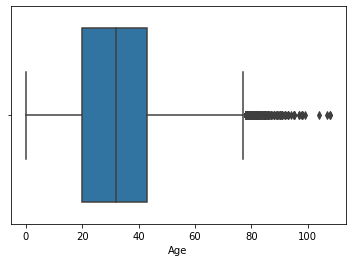

In [54]:
sns.boxplot(data=unique_data,x='Age')
plt.show()

# Project wise O / S / BR

In [60]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n{:d}".format(pct, absolute)

# Changing status values to O_S_BR
projectwise_O_S_BR = pd.DataFrame(unique_data.Status.value_counts())
projectwise_O_S_BR.reset_index(inplace=True)
projectwise_O_S_BR.rename(columns={'Status':'Total Application', 'index':'Status'}, inplace=True)
projectwise_O_S_BR.loc[len(projectwise_O_S_BR.index)] = ['Grand Total', projectwise_O_S_BR['Total Application'].sum()]

try:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[0,1]]
except Exception:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,0,2]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:2], labels=projectwise_O_S_BR['Status'][0:2], rotatelabels=True, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:2]), explode=[0.01,0.05], textprops={'fontsize' : 'small'}, labeldistance = 0.8)
except Exception:
    projectwise_O_S_BR = projectwise_O_S_BR.iloc[[1,2,0,3]]
    plt.pie(projectwise_O_S_BR['Total Application'][0:3], labels=projectwise_O_S_BR['Status'][0:3], rotatelabels=False, autopct=lambda pct: func(pct, projectwise_O_S_BR['Total Application'][0:3]), explode=[0.01,0.05,0.09], textprops={'fontsize' : 'small'}, labeldistance = 0.8)
else:
    projectwise_O_S_BR

projectwise_O_S_BR

,Status,Total Application
0,Benefit Received,60057
1,Open,7001


# Districtwise Count

In [61]:
districtWise = pd.pivot_table(data=unique_data, index='District', columns='Status', values='Case Id', aggfunc='count', fill_value=0).reset_index()

try:
    if 'Benefit Received' not in list(unique_data.Status.value_counts().index):
        districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Open'].sum(),districtWise['Submitted'].sum()]
        districtWise['Total'] = districtWise['Open']+districtWise['Submitted']
        districtWise = districtWise[['District', 'Open', 'Submitted', 'Total']]

    elif 'Submitted' not in list(unique_data.Status.value_counts().index):
        districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum()]
        districtWise['Total'] = districtWise['Benefit Received']+districtWise['Open']
        districtWise = districtWise[['District', 'Open', 'Benefit Received', 'Total']]

    elif 'Open' not in list(unique_data.Status.value_counts().index):
        districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Submitted'].sum()]
        districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']
        districtWise = districtWise[['District', 'Submitted', 'Benefit Received', 'Total']]
    else:
        districtWise.loc[len(districtWise)] = ['Grand Total',districtWise['Benefit Received'].sum(),districtWise['Open'].sum(),districtWise['Submitted'].sum()]
        districtWise['Total'] = districtWise['Benefit Received']+districtWise['Submitted']+districtWise['Open']
        districtWise = districtWise[['District', 'Open', 'Submitted', 'Benefit Received', 'Total']]
except:
    pass

districtWise

Status,District,Open,Submitted,Benefit Received,Total
0,Bahraich,13,0,0,13
1,Bhopal,9,0,8,17
2,Chhindwara,102,0,18,120
3,Dhanbad,15,0,19,34
4,Faridabad,1147,204,7074,8425
5,Gurugram,533,120,16304,16957
6,Haridwar,867,91,2323,3281
7,Indore,170,3,15,188
8,Jalgaon,16,2,28,46
9,Jhansi,4,8,26,38


# Orgwise Scheme Diversity

,State,Total unique schemes,Total Applications,Shcemes with more than 10% application
7,Odisha,2,5662,[]
6,Jharkhand,6,41253,[]
5,Madhya Pradesh,17,34,[]
4,Uttar Pradesh,18,325,[]
3,Delhi,20,22569,[]
2,Haryana,32,9,[]
1,Uttarakhand,34,188,[]
0,Maharashtra,40,3994,[]


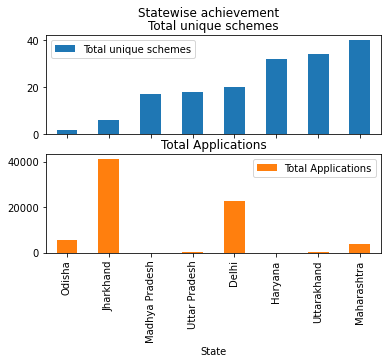

In [64]:
orgSchDiver = unique_data.pivot_table(index=['State','Scheme/Doc'], values='Case Id', aggfunc='count') # Pivoting unique data with "Case Organization" & "Scheme/Doc" rows and count of column "Case Id"
orgSchDiver.reset_index(inplace=True)
Orgwise_Scheme_Diversity = pd.DataFrame(orgSchDiver['State'].value_counts()).reset_index().rename(columns={'count':'Count of unique schemes'}).sort_values('State') # Converting pivot table to pandas data frame
Orgwise_Scheme_Diversity['Total Applications'] = orgSchDiver.groupby(by = 'State')['Case Id'].sum().values # Adding "Total no. of cases" column

'''# 18-35 - DFL Advance/Basic BR
digital_Adult = unique_data[(unique_data['Age'] >= 18) & (unique_data['Age'] <= 35) & (unique_data['Status'] == 'Benefit Received')]
digital_Adult = pd.pivot_table(data=digital_Adult, index = 'Scheme/Doc', values = 'Case Id', aggfunc='count').reset_index()
try:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[1]
except IndexError:
    Orgwise_Scheme_Diversity['18-35 - DFL Advance/Basic BR'] = digital_Adult[(digital_Adult['Scheme/Doc'] == 'Digital productivity Service_ Basic') |
                                                                         (digital_Adult['Scheme/Doc'] == 'Digital Productivity Services_Advanced')].sum()[0]'''

# Shcemes with more than 10% application
orgDict = {} # Declaring a empty dictionary to store Shcemes with more than 10% application
for org in Orgwise_Scheme_Diversity['State']:
    maxApp = pd.DataFrame(orgSchDiver[orgSchDiver['State'] == org].groupby('Scheme/Doc')['Case Id'].sum()
                          >
                          int(orgSchDiver[orgSchDiver['State'] == org]['Case Id'].sum()/10)) # Getting list of more then 10% application
    orgDict[org] = list(maxApp[maxApp['Case Id'] == True].index)
Orgwise_Scheme_Diversity['Shcemes with more than 10% application'] = orgDict.values() # Adding "Shcemes with more than 10% application" column

Orgwise_Scheme_Diversity.rename(columns={"State":"Total unique schemes", 'index':'State'}, inplace=True)
Orgwise_Scheme_Diversity[['State', 'Total unique schemes', 'Total Applications']].set_index('State').plot(kind='bar', title='Statewise achievement', subplots=True)
Orgwise_Scheme_Diversity

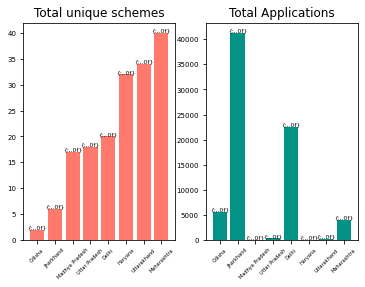

In [65]:
fig, ax = plt.subplots(1,2)

bar_container1 = ax[0].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total unique schemes'], color = '#FF796C')
bar_container2 = ax[1].bar(Orgwise_Scheme_Diversity.State, Orgwise_Scheme_Diversity['Total Applications'], color = '#029386')

ax[0].tick_params(axis = 'y', labelsize = 7.0)
ax[1].tick_params(axis = 'y', labelsize = 7.0)

ax[0].bar_label(bar_container1, fmt='{:,.0f}', fontsize=6.0)
ax[1].bar_label(bar_container2, fmt='{:,.0f}', fontsize=6.0)

ax[0].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)
ax[1].set_xticklabels(Orgwise_Scheme_Diversity.State, fontsize=5.0, rotation=45)

if len(Orgwise_Scheme_Diversity.State)>1:
    ax[0].set(title = 'Total unique schemes')
    ax[1].set(title = 'Total Applications')
else:
    ax[0].set(title = 'Total unique schemes', ylim = (math.floor(Orgwise_Scheme_Diversity['Total unique schemes'].sum())-1, math.ceil(Orgwise_Scheme_Diversity['Total unique schemes'].sum())+2))
    ax[1].set(title = 'Total Applications', ylim = (math.floor(Orgwise_Scheme_Diversity['Total Applications'].sum()), math.ceil(Orgwise_Scheme_Diversity['Total Applications'].sum())))

# Citizen Scheme Ratio

,Scheme Variety,Total Citizens,Total Cases
0,With 1 scheme,47907,47907
1,With 2 scheme,9363,18726
2,With 3 scheme,2120,6360
3,More than 3 schemes,256,1042
4,Grand Total,59646,74035


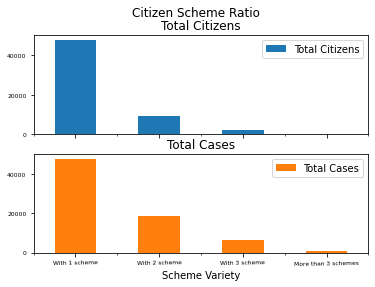

In [67]:
# Scheme variety wise application ratio
cit_sch_ratio = {'Scheme Variety':[],
                 'Total Citizens':[],
                 'Total Cases':[]}

no_of_cases = list(set(unique_data['No of cases'].value_counts().index))
no_of_case = []
no_of_cit = []
for n in no_of_cases:
    if n == 0:
        unique_data.drop(index=(unique_data[unique_data['No of cases'] == n].index), inplace=True)

    elif n>0 and n<=3:
        cit_sch_ratio['Scheme Variety'].append('With {0} scheme'.format(n))
        cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))
        cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] == n]))

    elif n>3:
        if 'More than 3 schemes' in cit_sch_ratio['Scheme Variety']:
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))

        else:
            cit_sch_ratio['Scheme Variety'].append('More than 3 schemes')
            no_of_case.append(len(unique_data[unique_data['No of cases'] == n]))
            no_of_cit.append(len(unique_data[unique_data['No of cases'] == n]['Citizen GUID'].value_counts()))

    else:
        break

# Adding sum of cases and citizens against "More than 3 schemes"
if n>3:
    cit_sch_ratio['Total Cases'].append(sum(no_of_case))
    cit_sch_ratio['Total Citizens'].append(sum(no_of_cit))

# Grand Total
cit_sch_ratio['Scheme Variety'].append('Grand Total')
cit_sch_ratio['Total Citizens'].append(sum(cit_sch_ratio['Total Citizens']))
cit_sch_ratio['Total Cases'].append(sum(cit_sch_ratio['Total Cases']))

# More than 7 schemes
if len(unique_data[unique_data['No of cases'] >= 7]) > 0:
    cit_sch_ratio['Scheme Variety'].append('More than 7 schemes')
    cit_sch_ratio['Total Cases'].append(len(unique_data[unique_data['No of cases'] >= 7]))
    cit_sch_ratio['Total Citizens'].append(len(unique_data[unique_data['No of cases'] >= 7]['Citizen GUID'].value_counts()))

cit_sch_ratio = pd.DataFrame(cit_sch_ratio)
cit_sch_ratio[~(cit_sch_ratio['Scheme Variety']=='Grand Total')].set_index('Scheme Variety').plot.bar(title='Citizen Scheme Ratio', label = 1, subplots=True, logy=False, log=False, rot=True, fontsize=6)
cit_sch_ratio

# Scheme Doc Ratio

,Scheme type,Unique Schemes,Total Applications,Total BV
0,Document,37,19871,850863470
1,Scheme,66,54164,2847264894


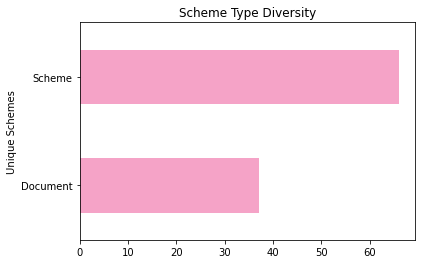

In [88]:
# Scheme type Total application
sch_doc_application = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_application.rename(columns={'Scheme/Doc' : 'Total Applications'}, inplace=True)

# Scheme type Total Benefit value
sch_doc_application['Total BV'] = list(unique_data.groupby(by ='Scheme type')['Benefit Value'].sum())

# Scheme type Total unique schemes
sch_doc_schemes = pd.DataFrame(unique_data.groupby(by = 'Scheme type')['Scheme/Doc'].value_counts()).drop(columns='Scheme/Doc').reset_index()
sch_doc_schemes = pd.DataFrame(sch_doc_schemes.groupby(by='Scheme type')['Scheme/Doc'].count()).reset_index()
sch_doc_schemes.rename(columns={'Scheme/Doc' : 'Unique Schemes'}, inplace=True)

# Merging both tables
sch_doc_ratio = sch_doc_schemes.merge(sch_doc_application, on = 'Scheme type', how = 'left')
sch_doc_ratio[['Scheme type','Unique Schemes']].set_index('Scheme type').plot(kind='barh', title='Scheme Type Diversity', color='#F5A3C7', legend=False, xlabel="Unique Schemes")
sch_doc_ratio

# Top Bottom HD

In [89]:
step = unique_data.copy() # Copying data to another variable to make some changes.
step['HD ID'] = step['HD ID'].fillna('a') # Replacing missing values with simple character 'a'
step['HD ID'] = step['HD ID'].astype('str') # Changing HD ID column data type to string so that all values can be converted to lower case.
step['HD ID'] = step['HD ID'].apply(lambda x: x.lower()) # Changing values to lower case.
if "Benefit Received" in step.Status:
    step1 = pd.pivot_table(data = step[step.Status == "Benefit Received"], index = ['HD ID', 'HD Name','Scheme/Doc GUID'], values = 'Case Id', aggfunc = 'count') # Pivoting to get unique HD ID/ HD ID/ Scheme Name
else:
    step1 = pd.pivot_table(data = step, index = ['HD ID', 'HD Name','Scheme/Doc GUID'], values = 'Case Id', aggfunc = 'count') # Pivoting to get unique HD ID/ HD ID/ Scheme Name
step1 = pd.DataFrame(step1.drop(columns='Case Id').reset_index()) # Delete unwanted column 'Case Id'
step1 = pd.DataFrame(pd.pivot_table(data=step, index=['HD ID','HD Name'], values='Scheme/Doc GUID', aggfunc='count').reset_index()).rename(columns={'Scheme/Doc GUID' : 'Total unique schemes'}) # Pivoting to get unique HD ID/ HD ID and unique count of schemes.
step2 = pd.DataFrame(step[step.Status == "Benefit Received"].groupby(by = 'HD ID')['Case Id'].count()).reset_index().rename(columns={'Case Id' : 'Total Applications'})
step3 = step.groupby('HD ID')['Benefit Value'].sum().reset_index()

if "Benefit Received" in step.Status:
    step4 = pd.pivot_table(data=step[step.Status == "Benefit Received"], index = ['HD ID'], values='HD_Payment', aggfunc='sum').reset_index().rename(columns = {'HD_Payment' : 'Total Payment'}) # Summing up HD payment
else:
    step4 = pd.pivot_table(data=step, index = ['HD ID'], values='HD_Payment', aggfunc='sum').reset_index().rename(columns = {'HD_Payment' : 'Total Payment'}) # Summing up HD payment

step5 = pd.pivot_table(rejectedDF, index=['HD ID'], values='HD_Payment', aggfunc='sum')
top_bottom_hd = step1.merge(step2, on = 'HD ID', how='left').merge(step3, on = 'HD ID', how='left').merge(step4, on = 'HD ID', how='left').merge(step5, on = 'HD ID', how='left')

if rejectedDF.shape[0] != 0:
    top_bottom_hd.HD_Payment = top_bottom_hd.HD_Payment.fillna(0)
    top_bottom_hd.rename(columns={'Benefit Value':'Benefit Value Delivered', 'HD_Payment' : 'Rejected Payment'}, inplace=True)
    top_bottom_hd.loc[len(top_bottom_hd)] = ['Grand Total', '', top_bottom_hd['Total unique schemes'].sum(),
                                             top_bottom_hd['Total Applications'].sum(), top_bottom_hd['Benefit Value Delivered'].sum(),
                                             top_bottom_hd['Total Payment'].sum(), top_bottom_hd['Rejected Payment'].sum()]
else:
    top_bottom_hd.rename(columns={'Benefit Value':'Benefit Value Delivered'}, inplace=True)
    top_bottom_hd.loc[len(top_bottom_hd)] = ['Grand Total', '', top_bottom_hd['Total unique schemes'].sum(),
                                             top_bottom_hd['Total Applications'].sum(), top_bottom_hd['Benefit Value Delivered'].sum(),
                                             top_bottom_hd['Total Payment'].sum()]
top_bottom_hd.tail()

,HD ID,HD Name,Total unique schemes,Total Applications,Benefit Value Delivered,Total Payment,Rejected Payment
304,yogita..,Daya Shankar Gupta,53,27.0,5461784,2050.0,700.0
305,yoosuf.khan,Yoosuf,82,79.0,5800538,2870.0,180.0
306,zayoki.kim,Barkha,9,9.0,779076,450.0,600.0
307,zubaida.khatoon,Jubaida Khatoon,1,1.0,50,15.0,0.0
308,Grand Total,,74035,60057.0,3698128364,2682905.0,29625.0


# Scheme Categorisation

In [90]:
Scheme_Categorisation = pd.DataFrame(pd.pivot_table(data = unique_data, index=['Scheme type', 'Scheme/Doc', 'Benefit Value'], values='Case Id', aggfunc= 'count')).reset_index()
Scheme_Categorisation['Total BV Delivered'] = Scheme_Categorisation['Benefit Value']*Scheme_Categorisation['Case Id']
Scheme_Categorisation.rename(columns={'Case Id':'Total Applications'}, inplace=True)
Scheme_Categorisation.loc[len(Scheme_Categorisation)] = ['Grand Total', '', '', Scheme_Categorisation['Total Applications'].sum(), Scheme_Categorisation['Total BV Delivered'].sum()]
Scheme_Categorisation.tail()

,Scheme type,Scheme/Doc,Benefit Value,Total Applications,Total BV Delivered
99,Scheme,Widow Pension_UP,12000,1,12000
100,Scheme,e-KYC for PM Kisan Samman Nidhi Yojana (Central),19247,2,38494
101,Scheme,eKYC MGNREGA_Central,49861,4,199444
102,Scheme,eKYC for Mazi Ladki Bahin Yojana_MH,18000,2011,36198000
103,Grand Total,,,74034,3698041800


# Schemewise O/S/BR

In [91]:
Sch_O_S_BR = pd.pivot_table(data = unique_data, index='Scheme/Doc', columns='Status', values='Case Id', aggfunc='count', fill_value=0)
Sch_O_S_BR = pd.DataFrame(Sch_O_S_BR).reset_index()
if len(unique_data.Status.value_counts().index) > 1:
    if 'Benefit Received' not in Sch_O_S_BR.columns:
        if 'Submitted' not in Sch_O_S_BR.columns:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
            Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
        elif 'Open' not in Sch_O_S_BR.columns:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
            Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
        else:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted']]
            Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted']].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR.Total.sum()]
    elif 'Submitted' not in Sch_O_S_BR.columns:
        if 'Benefit Received' not in Sch_O_S_BR.columns:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open']] # Open' & 'Submitted
            Sch_O_S_BR['Total'] = Sch_O_S_BR['Open'].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
        elif 'Open' not in Sch_O_S_BR.columns:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
            Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
        else:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Benefit Received']]
            Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Benefit Received']].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    elif 'Open' not in Sch_O_S_BR.columns:
        if 'Benefit Received' not in Sch_O_S_BR.columns:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted']] # Open' & 'Submitted
            Sch_O_S_BR['Total'] = Sch_O_S_BR['Submitted'].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(), Sch_O_S_BR.Total.sum()]
        elif 'Submitted' not in Sch_O_S_BR.columns:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Benefit Received']] # Open' & 'Submitted
            Sch_O_S_BR['Total'] = Sch_O_S_BR['Benefit Received'].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
        else:
            Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Submitted', 'Benefit Received']]
            Sch_O_S_BR['Total'] = Sch_O_S_BR[['Submitted', 'Benefit Received']].sum(axis=1)
            Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]
    else:
        Sch_O_S_BR = Sch_O_S_BR[['Scheme/Doc', 'Open', 'Submitted', 'Benefit Received']]
        Sch_O_S_BR['Total'] = Sch_O_S_BR[['Open', 'Submitted', 'Benefit Received']].sum(axis=1)
        Sch_O_S_BR.loc[len(Sch_O_S_BR)] = ['Grand Total', Sch_O_S_BR.Open.sum(),  Sch_O_S_BR.Submitted.sum(), Sch_O_S_BR['Benefit Received'].sum(), Sch_O_S_BR.Total.sum()]

Sch_O_S_BR.tail()

Status,Scheme/Doc,Open,Submitted,Benefit Received,Total
99,Widow Pension_UP,0,1,0,1
100,e-KYC for PM Kisan Samman Nidhi Yojana (Central),2,0,0,2
101,eKYC MGNREGA_Central,1,0,3,4
102,eKYC for Mazi Ladki Bahin Yojana_MH,182,193,1636,2011
103,Grand Total,7000,6977,60057,74034


# Gender Bifurcation

,Gender,Total Applications,% Contri.
0,Female,39042,52.73
1,Male,34977,47.24
2,Other,16,0.02
3,Total,74035,


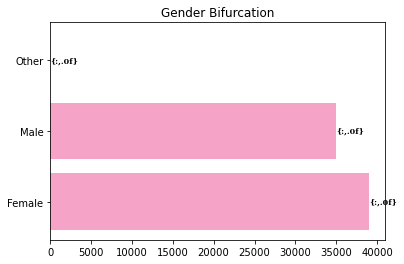

In [95]:
gen_Bif = pd.DataFrame(unique_data['Gender'].value_counts()).reset_index()
gen_Bif.rename(columns={'Gender':'Total Applications', 'index':'Gender'},inplace=True)
gen_Bif['% Contri.'] = round((gen_Bif['Total Applications']/unique_data['Gender'].value_counts().sum())*100,2)
gen_Bif.loc[len(gen_Bif)] = ['Total', gen_Bif['Total Applications'].sum(), '']
fig, ax = plt.subplots(1)

if len(gen_Bif['Gender']) == 4:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:3], y = gen_Bif['Gender'][0:3], width = gen_Bif['Total Applications'][0:3], color = '#F5A3C7')
elif len(gen_Bif['Gender']) == 3:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:2], y = gen_Bif['Gender'][0:2], width = gen_Bif['Total Applications'][0:2], color = '#F5A3C7')
else:
    bar_container = ax.barh(data = gen_Bif[['Gender', 'Total Applications']][0:1], y = gen_Bif['Gender'][0:1], width = gen_Bif['Total Applications'][0:1], color = '#F5A3C7')

ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=8.0, fontfamily='serif', fontweight='bold')
ax.set(title = 'Gender Bifurcation')

fig.show()
gen_Bif

# Centrewise Repeat Mobile numbers

In [96]:
repeat_mobile = pd.pivot_table(data=og_DF, index=['District', 'Mobile', 'Citizen GUID'], values='Case Id', aggfunc='count').sort_values(by='Case Id', ascending=False).reset_index()
repeat_mobile = pd.pivot_table(data=repeat_mobile, index=['District', 'Mobile'], values='Citizen GUID', aggfunc='count').sort_values(by='Citizen GUID', ascending=False).reset_index()
repeat_mobile = repeat_mobile[repeat_mobile['Citizen GUID']>5]
if repeat_mobile['Citizen GUID'].sum()>0:
    repeat_mobile.loc[len(repeat_mobile)] = ['Grand Total','',repeat_mobile['Citizen GUID'].sum()]
repeat_mobile.rename(columns={"Citizen GUID":"Total Citizens"}, inplace=True)
repeat_mobile.head()

,District,Mobile,Total Citizens
0,Pune,0.0,22064
1,Nuh,0.0,11793
2,Gurugram,0.0,10835
3,South West,0.0,5383
4,Faridabad,0.0,4977


# Agewise Citizen Distribution

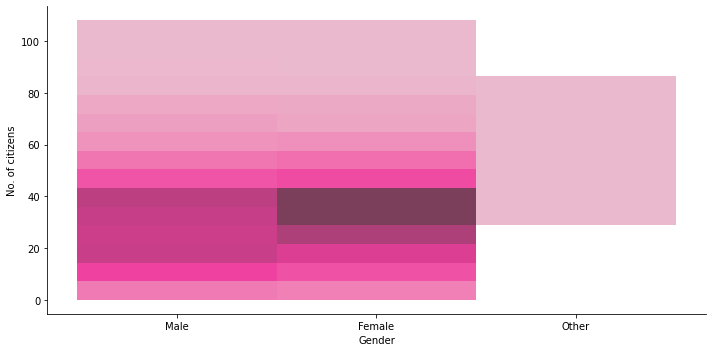

In [97]:
plot = sns.displot(data=unique_data, x='Gender', y='Age', kind='hist', bins=15, legend=True,  color='#F5A3C7', aspect=2)
plot.set(ylabel='No. of citizens')
plt.show()

# E-Gov and DFL Status Summary

In [98]:
eGov_DFL_Summary = pd.pivot_table(data=og_DF, index='District', columns=['Scheme Category','Status'], values='Case Id', aggfunc='count', fill_value=0)
eGov_DFL_Summary['Total'] = eGov_DFL_Summary.sum(axis = 1, numeric_only = 'True').values
eGov_DFL_Summary.sort_values(by='Total',ascending=False, inplace=True)
eGov_DFL_Summary.loc[len(eGov_DFL_Summary)] = eGov_DFL_Summary.sum(axis = 0, numeric_only = 'True').values
eGov_DFL_Summary.rename(index={eGov_DFL_Summary.index[-1]:'Grand Total'}, inplace=True)
eGov_DFL_Summary

Scheme Category                DFL                            E-Gov        \
Status            Benefit Received  Open Submitted Benefit Received  Open   
District                                                                    
Pune                         21741  1516        16             6943  2251   
Gurugram                     10844    28        89            15242   540   
Nuh                          11204   558        62            13408   888   
Faridabad                     4890     3       104             6543  1137   
South West                    4757   406       256               95    16   
Nashik                        2057     1        26             1740   245   
Haridwar                         0    62         0             2066   787   
North                           31     0         0             2014   132   
South                           35     0         0             1709   301   
Pithoragarh                      0   160         0              302    74   
South East                       0     0         0              283    50   
Mirzapur                       112   186         3                0     5   
Indore                          34    97         2               11   170   
Udham Singh Nagar                0   108         0               63    17   
Chhindwara                      78    15         1               15    99   
Bahraich                        58   115         1                0    13   
Jhansi                         107    18        16               24     2   
Bhopal                           8   102         3                4     9   
Lucknow                          7    53         7                8    14   
Kendujhar                       28    39         2                0     0   
Varanasi                         0    33         0                0     2   
West                             0     0         0               50     0   
Jalgaon                          0     0         0               26    16   
Dhanbad                          0     0         0                0    15   
New Delhi                        0     1         0               11     0   
Palwal                           0     0         0               10     0   
Rewari                           0     0         0                1     0   
Grand Total                  55991  3501       588            50568  6783   

Scheme Category                     MSME_Sch                              YC  \
Status            Submitted Benefit Received Open Submitted Benefit Received   
District                                                                       
Pune                   5359                0    0         0             4584   
Gurugram                120                0    0         0             1091   
Nuh                     152                0    0         0             1424   
Faridabad               205                0    0         0              584   
South West                7                1    0         1                0   
Nashik                   44              218   81         6             1038   
Haridwar                 91                0   10         0              258   
North                   707               17    0         1                0   
South                   214                0    1         0                5   
Pithoragarh               1                0    0         0              190   
South East               36                0    0         0               18   
Mirzapur                  1                0    0         0               49   
Indore                    3                0    0         0                4   
Udham Singh Nagar         1                0    0         0               59   
Chhindwara                0                0    0         0                3   
Bahraich                  0                0    0         0                0   
Jhansi                    8                0    1         0                2   
Bhopal      

# Exporting data to Excel Sheets

In [99]:
# Exporting data of unique records to Excel file.
print('Exporting unique data to Excel!')
with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' data.xlsx') as writer:
    unique_data.to_excel(writer, sheet_name='Schemes Data', index=False) # Exporting unique data
    projectwise_O_S_BR.to_excel(writer, sheet_name='projectwise_O_S_BR', index=False)
    districtWise.to_excel(writer, sheet_name='Districtwise achv', index=False)
    if repeat_mobile.shape[0]>0:
        repeat_mobile.to_excel(writer,sheet_name='Repeat_mobile_nos', index=False)
    Orgwise_Scheme_Diversity.to_excel(writer, sheet_name='Orgwise_Scheme_Diversity', index=False)
    cit_sch_ratio.to_excel(writer, sheet_name='Citizen_Scheme_Ratio', index=False)
    sch_doc_ratio.to_excel(writer, sheet_name='Scheme_Doc_Ratio', index=False)
    #top_bottom_hd.to_excel(writer, sheet_name='Top_Bottom_HD', index=False)
    Scheme_Categorisation.to_excel(writer, sheet_name='Scheme_Categorisation', index=False)
    Sch_O_S_BR.to_excel(writer, sheet_name='Schwise_O_S_BR', index=False)
    gen_Bif.to_excel(writer, sheet_name='Gender_Bifurcation', index=False)
    if dfl.shape[0]>0:
        eGov_DFL_Summary.to_excel(writer, sheet_name='eGov_DFL_Status_Summary')
        dfl.to_excel(writer, sheet_name='DFL data', index=False)
        dfl_uniques.to_excel(writer, sheet_name='DFL unique data', index=False)
    rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
    duplicateData.to_excel(writer, sheet_name='Duplicate data', index=False) # Exporting duplicate data
    parentDuplicateData.to_excel(writer, sheet_name='Parent Sch Duplicate', index=False) # Exporting parent scheme duplicate data
    #plot.savefig(writer, sheet_name='Age_Dist')
    writer.close()

exe_end = dt.now() # Recording execution end time
print('{0} project data exported to Excel!\nTotal {1} unique records exported.\nTotal {2} duplicate records exported.\nTotal {3} rejected records exported'.format(fn.split('_')[2]+' '+fn.split('_')[3],
                                                                                                                                                                   unique_data.shape[0],
                                                                                                                                                                   duplicateData.shape[0],
                                                                                                                                                                   rejectedDF.shape[0]))

Exporting unique data to Excel!
Hyundai Foundation Phase2 (All States) project data exported to Excel!
Total 74035 unique records exported.
Total 28515 duplicate records exported.
Total 1289 rejected records exported


# Logging the execution process

In [100]:
print('Logging Execution process...')
exe_end = dt.now()
log = [init_file_size,exe_start.strftime("%d/%m/%Y %H:%M:%S"),exe_end.strftime("%d/%m/%Y %H:%M:%S"),int(round((exe_end-exe_start).total_seconds(),0)),fn.split('_')[2]+' '+fn.split('_')[3],unique_data.shape[0],duplicateData.shape[0],rejectedDF.shape[0]]

lwb = load_workbook(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Loading the workbook
lws = lwb.worksheets[0] # Setting the worksheet
lws.append(log) # Appending the log row
lwb.save(r'C:\Python\export\Logs Remove Duplicate for Dashboard-Manas Algo.xlsx') # Saving the logged data
lwb.close()
print('Logging Done!\n',log)

Logging Execution process...
Logging Done!
 [41.96, '06/01/2026 10:42:49', '06/01/2026 11:38:03', 3315, 'Hyundai Foundation Phase2 (All States)', 74035, 28515, 1289]


# Projection Dashboard Update

In [101]:
delivery_hierarchy = pd.read_excel(r"C:\Python\read\Delivery_Hierarchy_Report.xlsx")
delivery_hierarchy['Employee Name'] = delivery_hierarchy['Employee Name'].apply(lambda x: (' '.join(x.strip().split())).title())


# For HUL projection dashboard update
if PID == 'PID/HINDU13/2023/MSME-DI/0376':

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update HUL projection? (Y/N)")
    if consent in ('y', 'Y'):
        print("Updating HUL projection dashboard...")
        hul_data = unique_data.copy()
        hul_data['Week'] = hul_data.Createdon.apply(lambda x: "W1" if x.day <=7 else "W2" if x.day >= 8 and x.day <=14 else "W3" if x.day >= 15 and x.day <= 21 else "W4")
        sch_map = {'SH000A4G' : 'Credit', 'SH000B2I' : 'Credit', 'SH000AJC' : 'Credit', 'SH0009RA' : 'Credit', 'SH000A5H' : 'Credit', 'SH0009IX' : 'Credit', 'SH000DPW' : 'Credit', 'SH0003PE':'Credit',
                   'SH0003PK':'Credit','SH000888':'Credit','SH0008BK':'Credit','SH0008PZ':'Credit','SH000971':'Credit','SH0009RA':'Credit','SH000AP8':'Credit','SH000BG8':'Credit','SH000CM7':'Credit',
                   'SH000D1A':'Credit','SH000DG0':'Credit','DC0008R0':'Formalization','DC0008WZ':'Formalization','DC00096J':'Formalization','DC000DG3':'Formalization','SH0009RR':'YC'}
        hul_data['HUL Category'] = hul_data['Scheme/Doc GUID'].apply(lambda x: sch_map[x] if x in sch_map.keys() else 'Scheme')
        hul_data.State = hul_data.State.apply(lambda x: "Punjab" if x=="Haryana" else x)
        step1 = pd.pivot_table(data=hul_data[hul_data['Createdon']>="2025-1-1"], index=['Opsco name', 'HD ID'], values='Case Id', aggfunc='count').reset_index() # Create a table to get HD list against each Opsco
        step2 = pd.pivot_table(data=step1, index='Opsco name', values='HD ID', aggfunc='count').reset_index() # Get count of HDs against each Opsco
        step2.rename(columns={'HD ID':'HD Count'}, inplace=True)
        hul_data = hul_data.merge(step2, on="Opsco name", how='left') # Merge the count of HDs for each opsco against main data
        hul_data.rename(columns={'HD ID_y':'HD Count'}, inplace=True) # Rename merged column.
        hul_data['HD Count'].fillna(0, inplace=True)
        col_ord = ['Case Id', 'HUL Category', 'Opsco name', 'Createdon', 'Scheme/Doc', 'Scheme/Doc GUID', 'Status', 'Docket Submitted Date', 'Benefit received Date', 'HD Suspected Cases', 'State', 'District',
                   'Citizen GUID', 'Citizen Name', 'Gender', 'Mobile', 'Age', 'Citizen Block', 'Citizen Village', 'Family GUID', 'Family Name', 'HD ID', 'HD ID', 'AMS ID', 'Parent Scheme', 'Scheme type',
                   'Benefit Value','open_price','Docket submitted price','scheme_document_received price','HD_Payment','Scheme Category', 'duplicate','parent_duplicate', 'No of cases', 'Week', 'HD Count']
        with pd.ExcelWriter(r"F:\Haqdarshak Data\HUL\HUL New Tracker_Mar'25.xlsx", if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            hul_data[col_ord].to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
        #with pd.ExcelWriter(r"F:\Haqdarshak Data\HUL\HUL - YC and formalisation Plan_Nov-Dec 2024.xlsx", if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            #hul_data[col_ord].to_excel(writer, sheet_name='Schemes Data', index=False)
            #file_handler.close()
        Rahul = ["Vinayak Shivdas Mahajan","Shruti Ashvin Chaudhari","Komal Deshbhratar","Pooja Yogeshvar Bhangale","Dipali Rajendra Mahajan","Sandesh Pol","Ulhas Mali","Matre Puja","Umesh Badgujar",
                 "Dipali Bharaskar","Shital Bhamare","Sumedha Suryawanshi","Sayali Ahirrao","Sushama Bhalerao", "Madhuri Khairnar","Shilpa Shivaji Sadgir","Gopal Gadilohar","Sujata Adakmol"]
        Muneer = ['Ankit Kumar','Tarun Dangi','Jay Prakash','Bhaskar Sinha','Priti Rani','Muneer Alam Khan','Sonam Goswami']
        hul_data.State = hul_data[['State','Opsco name']].apply(lambda x: 'Rahul' if x[1] in Rahul else 'Muneer' if x[1] in Muneer else x[0], axis=1)
        with pd.ExcelWriter(r"F:\Haqdarshak Data\HUL\HUL Visualization.xlsx", if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            hul_data[col_ord].to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
        col_ord = ['Case Id', 'HUL Category', 'State','Opsco name', 'Createdon', 'Scheme/Doc', 'Scheme/Doc GUID', 'Status', 'Docket Submitted Date', 'Benefit received Date', 'HD Suspected Cases', 'District',
                   'Citizen GUID', 'Citizen Name', 'Gender', 'Mobile', 'Age', 'Citizen Block', 'Citizen Village', 'Family GUID', 'Family Name', 'HD ID', 'HD ID', 'AMS ID', 'Parent Scheme', 'Scheme type',
                   'Benefit Value','open_price','Docket submitted price','scheme_document_received price','HD_Payment','Scheme Category', 'duplicate','parent_duplicate', 'No of cases', 'Week', 'HD Count']
        with pd.ExcelWriter(r"F:\Haqdarshak Data\HUL\HUL State-Opscowise Count.xlsx", if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            hul_data[col_ord].to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
        print("HUL projection updated!")
    else:
        print("You chose NO to update HUL Projection!")

# For Colgate projection dashboard update
if PID == 'PID/COLGA/2024/Custom/YK/0426':

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update Colgate projection? (Y/N)")
    if consent in ('y', 'Y'):
        print("Updating Colgate projection dashboard...")
        colgate_data = pd.concat([unique_data, dfl], ignore_index=True)
        with pd.ExcelWriter(r'F:\HQ Google Drive\.shortcut-targets-by-id\1-5hZJ2rAADkd7-Hfk7keG3YYTSN79fXE\Haqdarshak ulfat\Colgate Phase 2\Colgate State-Opscowise Count.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            colgate_data.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
            #writer.close()
        print("Colgate projection updated!")
    else:
        print("You chose NO to update Colgate Projection!")

# For Colgate Phase 3 projection dashboard update
if PID == 'PID/COLGA/2025/DI/0532':

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update Colgate Phase 3 projection? (Y/N)")
    if consent in ('y', 'Y'):
        print("Updating Colgate Phase 3 projection dashboard...")
        all_unique = pd.concat([unique_data,dfl], ignore_index=True) # Merging Unique data and DFL data
        # Creating BR status pivot table
        br_status = pd.pivot_table(all_unique[all_unique.Status=='Benefit Received'], index=['State','Opsco name','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0).reset_index()
        br_status['Grand Total'] = br_status[['DFL', 'E-Gov', 'YC']].sum(axis=1)
        
        # YC + 1 Sch
        YC_1_Sch = br_status[(br_status['Grand Total']==2) & (br_status.YC==1) & (br_status['E-Gov']==1)].reset_index()
        all_unique = all_unique.merge(YC_1_Sch[['Citizen GUID','Grand Total']], on='Citizen GUID', how='left').fillna("No")
        all_unique.rename(columns={'Grand Total':"YC+1 Sch"}, inplace=True)
        all_unique['YC+1 Sch'] = all_unique['YC+1 Sch'].apply(lambda x: "Yes" if x!="No" else x)
        YC_1_Sch = YC_1_Sch.groupby(['State', 'Opsco name'], as_index=False)['Citizen GUID'].nunique()
        YC_1_Sch.rename(columns={'Citizen GUID' : 'YC + 1 Sch'}, inplace=True)
        
        # YC + 2 Sch
        YC_2_Sch = br_status[(br_status['Grand Total']==3) & (br_status.YC==1) & (br_status['E-Gov']>=1) & (br_status.DFL==0)].reset_index()
        all_unique = all_unique.merge(YC_2_Sch[['Citizen GUID','Grand Total']], on='Citizen GUID', how='left').fillna("No")
        all_unique.rename(columns={'Grand Total':"YC+2 Sch"}, inplace=True)
        all_unique['YC+2 Sch'] = all_unique['YC+2 Sch'].apply(lambda x: "Yes" if x!="No" else x)
        YC_2_Sch = YC_2_Sch.groupby(['State', 'Opsco name'], as_index=False)['Citizen GUID'].nunique()
        YC_2_Sch.rename(columns={'Citizen GUID' : 'YC + 2 Sch'}, inplace=True)
        
        # Merging both YC + 1 & 2 sch to get Opscowise summary
        opscowise_unique_cit = YC_1_Sch.merge(YC_2_Sch, on = ['State','Opsco name'], how = 'outer').fillna(0)
        
        # Satewise Summary
        statewise_unique_cit = opscowise_unique_cit.groupby('State',as_index=False)[['YC + 1 Sch','YC + 2 Sch']].sum()

        #Exporting data to Excel
        with pd.ExcelWriter(r'F:\HQ Google Drive\.shortcut-targets-by-id\1-5hZJ2rAADkd7-Hfk7keG3YYTSN79fXE\Haqdarshak ulfat\Colgate Phase 3\Colgate P3 State-Opscowise Count.xlsx', if_sheet_exists='overlay', mode='a', engine='openpyxl') as writer:
            all_unique.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
            delivery_hierarchy[delivery_hierarchy.PID==PID].to_excel(writer, sheet_name='Delivery Hierarchy Report', index=False)
            statewise_unique_cit[['YC + 1 Sch','YC + 2 Sch']].to_excel(writer, sheet_name='Begining to day', index=False, startcol=12, startrow=1)
            opscowise_unique_cit.to_excel(writer, sheet_name='Begining to day', index=False, startrow=9)
        '''    
        sh = gc.open('Test Colgate P3')
        ws = sh.worksheet('Sch_DFL_data')
        ws.clear()
        for col in all_unique.columns:
            if all_unique[col].dtype == '<M8[ns]':
                all_unique[col] = all_unique[col].astype('str')
        all_unique = all_unique.replace([np.nan, np.inf, -np.inf], None)
        ws.update([all_unique.columns.values.tolist()]+all_unique.values.tolist(),"A1")'''
        print("Colgate Phase 3 projection updated!")
    else:
        print("You chose NO to update Colgate Phase 3 Projection!")

# For Hyundai projection dashboard update
if PID == 'PID/HYUND1/2024/Custom/YK/0475':

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update Hyundai projection? (Y/N)")
    if consent in ('y', 'Y'):
        print("Updating Hyundai projection dashboard...")
        hyundai_data = pd.concat([unique_data, dfl], ignore_index=True)
        hyundai_data.District = hyundai_data[['State','District']].apply(lambda x: 'Gurugram' if x[0]=="Haryana" or x[0]=="Delhi" else 'Nashik' if x[1] in ['Ahmednagar','Amravati','Beed','Hingoli','Nashik','Washim'] else 'Pune' if x[1] in ['Pune','Raigad','Solapur'] else x[1], axis=1)
        with pd.ExcelWriter(r'F:\HQ Google Drive\.shortcut-targets-by-id\1-5hZJ2rAADkd7-Hfk7keG3YYTSN79fXE\Haqdarshak ulfat\Hyundai Phase 1\Hyundai State-Opscowise Count.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            hyundai_data.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
            delivery_hierarchy[delivery_hierarchy.PID==PID].to_excel(writer, sheet_name='Delivery Hierarchy Report', index=False)
        print("Hyundai State-Opscowise tracker updated!")
        #with pd.ExcelWriter(r'F:\Haqdarshak Data\Hyundai\Hyundai_ Action Plan 4th Milestone.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
        #    hyundai_data.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Hyundai\Hyundai - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            hyundai_data.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
        print('Hyundai Daily tracker updated!')
            #writer.close()
        print('Hyundai projection updated!')
    else:
        print("You chose NO to update Hyundai Projection!")

# For Hyundai phase 2 projection dashboard update
if PID == 'PID/HYUND1/2025/DI/YK/0530':

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update Hyundai phase 2 projection? (Y/N)")
    if consent in ('y', 'Y'):
        print("Updating Hyundai phase 2 projection dashboard...")
        hyundai_data = pd.concat([unique_data, dfl], ignore_index=True)
        hyundai_data.District = hyundai_data[['State','District']].apply(lambda x: 'Gurugram' if x[0] in ["Haryana", "Delhi"] else 'Nashik' if x[1] in ['Ahmednagar','Amravati','Beed','Hingoli','Nashik','Washim'] else 'Pune' if x[1] in ['Pune','Raigad','Solapur'] else x[1], axis=1)
        with pd.ExcelWriter(r'F:\HQ Google Drive\.shortcut-targets-by-id\1-5hZJ2rAADkd7-Hfk7keG3YYTSN79fXE\Haqdarshak ulfat\Hyundai Phase 2\Hyundai Phase 2 State-Opscowise Count.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            hyundai_data.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
            delivery_hierarchy[delivery_hierarchy.PID==PID].to_excel(writer, sheet_name='Delivery Hierarchy Report', index=False)
        print("Hyundai phase 2 State-Opscowise tracker updated!")
        #with pd.ExcelWriter(r'F:\Haqdarshak Data\Hyundai\Hyundai_ Action Plan 4th Milestone.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
        #    hyundai_data.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Hyundai\Phase 2\Hyundai Phase 2 - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            hyundai_data.to_excel(writer, sheet_name='Sch_DFL_data', index=False)
        print("Hyundai phase 2 Daily tracker updated!")
            #writer.close()
        print("Hyundai phase 2 projection updated!")
    else:
        print("You chose NO to update Hyundai phase 2 Projection!")

# For LTPCT Subir Phase 2 projection dashboard update
if PID in ['PID/LTPUB/2024/DI/0431','PID/LARSE2/2025/DI/YK/0527']:

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update LTPCT Subir Phase 2 KPIs? (Y/N)")
    if consent in ('y', 'Y'):
        print("Updating LTPCT Subir Phase 2 KPIs...")
        LTPCT_Indicators = pd.read_excel('F:\Haqdarshak Data\LTPCT\Scheme Indicator Categorization.xlsx', sheet_name='Subir')
        subir = unique_data.merge(LTPCT_Indicators[['Scheme GUID','Indicator']], left_on="Scheme/Doc GUID", right_on="Scheme GUID", how='left')
        subir.drop(columns="Scheme GUID", inplace=True)
        with pd.ExcelWriter(r'F:\Haqdarshak Data\LTPCT\Phase 2\Subir\LTPCT Subir Phase 2 KPI Tracking.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            subir.to_excel(writer, sheet_name='Schemes Data', index=False)
        print("LTPCT Subir Phase 2 KPIs updated!")
    else:
        print("You chose NO to update LTPCT Subir Phase 2 KPIs!")

# For LTPCT Ahwa & Vikramgad Phase 2 projection dashboard update
if PID in ['PID/LARSE2/2024/Custom/YK/0425','PID/LARSE2/2025/DI/YK/0526']:

    # Notifying user to give consent..
    notification = Notify()
    notification.title = "Consent Required"
    notification.message = "Hello Akash! Waiting for your consent."
    notification.audio = "E:/Music/Ringtone/Consent required1.wav"
    notification.send()

    # Asking consent from user for original data export.
    consent = input("Do you want to update LTPCT Ahwa & Vikramgad Phase 2 KPIs? (Y/N)")
    if consent in ('y', 'Y'):
        print("Updating LTPCT Ahwa & Vikramgad Phase 2 KPIs...")
        LTPCT_Indicators_Vikramgarh = pd.read_excel('F:\Haqdarshak Data\LTPCT\Scheme Indicator Categorization.xlsx', sheet_name='Vikramgarh')
        LTPCT_Indicators_Ahwa = pd.read_excel('F:\Haqdarshak Data\LTPCT\Scheme Indicator Categorization.xlsx', sheet_name='Ahwa')
        vikramgad = unique_data[unique_data.State == "Maharashtra"].merge(LTPCT_Indicators_Vikramgarh[['Scheme GUID','Indicator']], left_on="Scheme/Doc GUID", right_on="Scheme GUID", how='left')
        ahwa = unique_data[unique_data.State == "Gujarat"].merge(LTPCT_Indicators_Ahwa[['Scheme GUID','Indicator']], left_on="Scheme/Doc GUID", right_on="Scheme GUID", how='left')
        ahwa_vikramgad = pd.concat([vikramgad,ahwa], ignore_index=True)
        ahwa_vikramgad.drop(columns="Scheme GUID", inplace=True)
        ahwa_vikramgad.drop_duplicates(subset="Case Id", inplace=True)
        with pd.ExcelWriter(r'F:\Haqdarshak Data\LTPCT\Phase 2\Ahwa & Vikramgad\LTPCT Ahwa & Vikramgad Phase 2 KPI Tracking.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            ahwa_vikramgad.to_excel(writer, sheet_name='Schemes Data', index=False)
        print("LTPCT Ahwa & Vikramgad Phase 2 KPIs updated!")
    else:
        print("You chose NO to update LTPCT Ahwa & Vikramgad Phase 2 KPIs!")


Do you want to update Hyundai phase 2 projection? (Y/N) Y


Updating Hyundai phase 2 projection dashboard...
Hyundai phase 2 State-Opscowise tracker updated!
Hyundai phase 2 Daily tracker updated!
Hyundai phase 2 projection updated!


# Weekly Tracker Update

In [102]:
if PID in ['PID/TATAP8/2025/DI/0550','PID/THERM2/2025/DI/0552','PID/SEDFU/2025/Custom/YK/0543','PID/TATAP2/2024/DI/0457','PID/TATAP7/2023/DI/0280','PID/TATAS1/2024/DI/0447','PID/THERM2/2024/DI/0437','PID/EICHE1/2024/DI/0439','PID/SEDFU/2024/Custom/YK/0454','PID/ALLIN1/2025/DI/0511','PID/BABLE/2025/DI/0510','PID/GOODV/2025/DI/0512','PID/NIITF/2025/DI/0513','PID/STEEL2/2025/DI/0509','PID/DLFFO/2024/Custom/0448','PID/DBSBA/2024/DI/YK/0452','PID/ZOMAT/2025/DI/0518','PID/TATAP8/2025/DI/0551']:
    if PID == 'PID/TATAP2/2024/DI/0457':
        print('Tata Power Renewables data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Tata Power\Tata Power Renewables (TPREL, TPSSL, WREL) Multi state FY 25\Tata Power Renew - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('Tata Power Renewables data export successful')
    elif PID == 'PID/TATAP7/2023/DI/0280':
        print('Tata Power (Maithon) data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Tata Power\Tata Power (Maithon)\Tata Power Maithon - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('Tata Power (Maithon) data export successful')
    elif PID == 'PID/TATAS1/2024/DI/0447':
        print('Tata Steel data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Tata Power\Tata Steel\Tata Steel - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('Tata Steel data export successful')
    elif PID == 'PID/THERM2/2024/DI/0437':
        print('Thermax data exporting...')
        thermax_data = unique_data.copy()
        siteNameRef = pd.read_excel(r'F:\Haqdarshak Data\Thermax Global Scale Up\Site Name Mapping.xlsx')
        siteMapCit = siteNameRef['Citizen GUID'].to_list()
        thermax_data['Thermax site location name'] = thermax_data[['Citizen GUID','Thermax site location name']].apply(lambda x: siteNameRef[siteNameRef['Citizen GUID']==x[0]]['Client Name'].reset_index(drop=True)[0]
                                                                                                                     if x[0] in siteMapCit else x[1], axis=1)
        thermax_data['Thermax site location name'] = thermax_data['Thermax site location name'].apply(lambda x: x if x in [np.nan] else 'ACC Cement Kymore' if x.startswith('ACC') else 'Amneal-Palli'
                                                                                                    if x.startswith('Amneal') else 'Biocon-Bangalore' if x.startswith('Biocon') else x.strip())
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Thermax Global Scale Up\Thermax Global - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            thermax_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
        lastWeek = pd.date_range(dt.today().date()-timedelta(days=7), dt.today().date())
        thermax_data['Last week'] = thermax_data.Createdon.apply(lambda x: "Yes" if dt.strftime(x,"%Y-%m-%d") in lastWeek else "No")
        if "Citizen District" in data0.columns:
            unique_worker = ['Citizen District','Citizen GUID','Citizen Name','Mobile','Scheme/Doc','No of cases','Thermax site location name','isYC','Last week']
        else:
            unique_worker = ['District','Citizen GUID','Citizen Name','Mobile','Scheme/Doc','No of cases','Thermax site location name','isYC','Last week']
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Thermax Global Scale Up\Thermax Sitewise Scheme Diversity.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            thermax_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            unique_worker_data = thermax_data[unique_worker]
            unique_worker_data = unique_worker_data[(unique_worker_data['No of cases']>1) & (~unique_worker_data['Thermax site location name'].isna()) & (unique_worker_data['Thermax site location name']!="? string:? string:CT0006E0 ? ?") & (unique_worker_data['Thermax site location name']!="? string:? string:CT0006EN ? ?") & (unique_worker_data['Thermax site location name']!="? string:? string:CT0006FD ? ?")]
            unique_worker_data.rename(columns={'No of cases':'Schemes per worker','Thermax site location name':'Client Name','isYC':'Loyalty Yojna (Y/N)'},inplace=True)
            unique_worker_data = pd.concat([pd.DataFrame(["List of "+str(unique_worker_data['Citizen GUID'].value_counts().shape[0])+" unique workers with 2 or more schemes."]),unique_worker_data],ignore_index=True)
            sheet_name = "Unique workers As of "+str(dt.today().day-1)+"_"+str(dt.today().month)+"_"+dt.strftime(dt.today(),"%y")
            unique_worker_data.to_excel(writer, sheet_name=sheet_name, index=True)
            #writer.close()
            print('Thermax data export successful')
    elif PID == 'PID/THERM2/2025/DI/0552':
        print('Thermax 3.0 data exporting...')
        thermax3 = pd.concat([unique_data,dfl]) # Merging Unique data and DFL data
        # Creating pivot based on BR status
        BR_status = pd.pivot_table(thermax3[thermax3.Status=='Benefit Received'], index=['State','District','Thermax site location name','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count').fillna(0).reset_index()
        int_col = [c for c in BR_status.columns if BR_status[c].dtype == 'float64'] # Getting integer columns to summation.
        BR_status['Grand Total'] = BR_status[int_col].sum(axis=1) # Adding the column for Grand Total.
        thermax3_daily_tracker = BR_status.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Grand Total'].sum()
        thermax3_daily_tracker.drop(columns='Grand Total', inplace=True)
        thermax3_daily_tracker['concated'] = thermax3_daily_tracker['State'] + thermax3_daily_tracker['District'] + thermax3_daily_tracker['Thermax site location name']
        thermax3_daily_tracker
        
        # Filtering on KPIs..
        only_sch = BR_status.query('`E-Gov` == 1 and `Grand Total` == 1')
        
        only_DFL = BR_status.query('DFL == 1 and `Grand Total` == 1')
        
        only_YC = BR_status.query('YC == 1 and `Grand Total` == 1')
        
        DFL_Sch_YC = BR_status.query('`E-Gov` >= 1 and DFL == 1 and YC == 1 and `Grand Total` > 2')
        
        DFL_YC = BR_status.query('DFL == 1 and YC == 1 and `Grand Total` == 2')
        
        DFL_Sch = BR_status.query('`E-Gov` >= 1 and DFL == 1 and YC == 0 and `Grand Total` > 1')
        
        Sch_YC = BR_status.query('`E-Gov` >=1 and YC == 1 and DFL == 0 and `Grand Total` > 1')
        
        
        # Initialising individual dataframes for each KPI
        only_sch_BR = only_sch.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Citizen GUID'].nunique()
        only_sch_BR['concated'] = only_sch_BR['State'] + only_sch_BR['District'] + only_sch_BR['Thermax site location name']
        
        only_DFL_BR = only_DFL.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Citizen GUID'].nunique()
        only_DFL_BR['concated'] = only_DFL_BR['State'] + only_DFL_BR['District'] + only_DFL_BR['Thermax site location name']
        
        only_YC_BR = only_YC.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Citizen GUID'].nunique()
        only_YC_BR['concated'] = only_YC_BR['State'] + only_YC_BR['District'] + only_YC_BR['Thermax site location name']
        
        DFL_Sch_YC_BR = DFL_Sch_YC.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Citizen GUID'].nunique()
        DFL_Sch_YC_BR['concated'] = DFL_Sch_YC_BR['State'] + DFL_Sch_YC_BR['District'] + DFL_Sch_YC_BR['Thermax site location name']
        
        DFL_YC_BR = DFL_YC.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Citizen GUID'].nunique()
        DFL_YC_BR['concated'] = DFL_YC_BR['State'] + DFL_YC_BR['District'] + DFL_YC_BR['Thermax site location name']
        
        DFL_Sch_BR = DFL_Sch.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Citizen GUID'].nunique()
        DFL_Sch_BR['concated'] = DFL_Sch_BR['State'] + DFL_Sch_BR['District'] + DFL_Sch_BR['Thermax site location name']
        
        Sch_YC_BR = Sch_YC.groupby(['State', 'District', 'Thermax site location name'], as_index=False)['Citizen GUID'].nunique()
        Sch_YC_BR['concated'] = Sch_YC_BR['State'] + Sch_YC_BR['District'] + Sch_YC_BR['Thermax site location name']
        
        
        # Initialising final daily tracker dataframe.
        variables = [only_sch_BR, only_DFL_BR, only_YC_BR, DFL_Sch_YC_BR, DFL_YC_BR, DFL_Sch_BR, Sch_YC_BR] # Collection of variables for loop.
        col_names = ['Only Schemes (BR)', 'Only DFL (BR)', 'Only YC (BR)', 'DFL+Sch+YC (BR)', 'DFL+YC (BR)', 'DFL+Sch (BR)', 'Sch+YC (BR)'] # Collection of column names for loop.
        for v,cn in zip(variables,col_names): # Looping through variables and column names.
            thermax3_daily_tracker = thermax3_daily_tracker.merge(v[['concated', 'Citizen GUID']], on = 'concated', how = 'left').fillna(0)
            thermax3_daily_tracker.rename(columns = {'Citizen GUID' : cn}, inplace=True)
        thermax3_daily_tracker.drop(columns='concated', inplace = True)        
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Thermax Global Scale Up\Phase 3\Thermax Phase 3 - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            thermax3.to_excel(writer, sheet_name='Schemes Data', index=False)
            thermax3_daily_tracker.to_excel(writer, sheet_name='Sitewise Unique Citizens', index=False)
        print('Thermax 3.0 data export successful')
    
    elif PID == 'PID/EICHE1/2024/DI/0439':
        print('Eicher data exporting...')
        eicher = unique_data.copy()
        eicher_locWise = pd.pivot_table(eicher, index=['State','District','Citizen GUID','Citizen Name','Mobile','Scheme/Doc','No of cases','isYC'], values='Case Id', aggfunc='count')
        eicher_locWise = pd.DataFrame(eicher_locWise).reset_index()
        eicher_locWise.rename(columns={'No of cases':'Schemes per Driver','isYC':'Loyalty Yojna (Y/N)'}, inplace=True)
        eicher_locWise.drop(columns='Case Id', inplace=True)
        with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' data.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            sheet_name = "Unique drivers As of "+str(dt.today().day-1)+"_"+str(dt.today().month)+"_"+dt.strftime(dt.today(),"%y")
            eicher_locWise.to_excel(writer, sheet_name=sheet_name, index=False)
            #writer.close()
            print('Eicher data export successful')
    
    elif PID == 'PID/SEDFU/2024/Custom/YK/0454':
        print('SED Fund data exporting...')
        sed_fund = pd.concat([unique_data,dfl_uniques])
        col_ord = ['Case Id','Createdon','Scheme Category','Scheme/Doc','Scheme/Doc GUID','Status','Docket Submitted Date','Benefit received Date','HD Suspected Cases','State','District','Citizen GUID','Citizen Name','Gender','Mobile','Age','Citizen Block','Citizen Village','Family GUID','Family Name','HD ID','HD Name','Opsco name','AMS ID','isYC','Parent Scheme','Scheme type','Benefit Value','open_price','Docket submitted price','scheme_document_received price','HD_Payment','duplicate','parent_duplicate','No of cases']
        with pd.ExcelWriter(r'F:\Haqdarshak Data\SED Fund\SED Fund - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            sed_fund[col_ord].to_excel(writer, sheet_name='Sch_DFL Data', index=False)
        col_ord=['Case Id','Createdon','Scheme/Doc','Scheme/Doc GUID','Status','Docket Submitted Date','Benefit received Date','HD Suspected Cases','State','Opsco name','HD Name','District','Citizen GUID','Citizen Name','Gender','Mobile','Age','Citizen Block','Citizen Village','Family GUID','Family Name','HD ID','AMS ID','isYC','Parent Scheme','Scheme type','Benefit Value','open_price','Docket submitted price','scheme_document_received price','HD_Payment','Scheme Category','duplicate','parent_duplicate','No of cases']
        with pd.ExcelWriter(r'F:\Haqdarshak Data\SED Fund\SED Fund HD_State wise weekly achvmt.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            sed_fund[col_ord].to_excel(writer, sheet_name='Sch_DFL Data', index=False)
            #writer.close()
            print('SED Fund data export successful')
    
    elif PID == 'PID/SEDFU/2025/Custom/YK/0543':
        print('SED Fund 2.0 data exporting...')
        sed_fund = pd.concat([unique_data,dfl_uniques])
        col_ord=['Case Id','Createdon','Scheme/Doc','Scheme/Doc GUID','Status','Docket Submitted Date','Benefit received Date','HD Suspected Cases','State','Opsco name','HD Name','District','Citizen GUID','Citizen Name','Gender','Mobile','Age','Citizen Block','Citizen Village','Family GUID','Family Name','HD ID','AMS ID','isYC','Parent Scheme','Scheme type','Benefit Value','open_price','Docket submitted price','scheme_document_received price','HD_Payment','Scheme Category','duplicate','parent_duplicate','No of cases']
        with pd.ExcelWriter(r'F:\Haqdarshak Data\SED Fund\Phase 2\SED Fund 2.0 HD_State wise weekly achvmt.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            sed_fund[col_ord].to_excel(writer, sheet_name='Sch_DFL Data', index=False)
            #writer.close()
            print('SED Fund 2.0 data export successful')
    
    elif PID == 'PID/STEEL2/2025/DI/0509':
        print('Steel Authority of India Limited (IISCO Burnpur) data exporting...')
        #sed_fund = pd.concat([unique_data,dfl_uniques])
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Steel Authority of India Limited (IISCO Burnpur)\Steel Authority of India Limited (IISCO Burnpur) - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('Steel Authority of India Limited (IISCO Burnpur) data export successful')
    
    elif PID == 'PID/ALLIN1/2025/DI/0511':
        print('UNICEF (Urban)- AISECT data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\UNICEF\AISECT\UNICEF AISECT - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('UNICEF (Urban)- AISECT data export successful')
    
    elif PID == 'PID/BABLE/2025/DI/0510':
        print('UNICEF (Urban)- B ABLE data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\UNICEF\B ABLE\UNICEF B ABLE - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('UNICEF (Urban)- B ABLE data export successful')
    
    elif PID == 'PID/GOODV/2025/DI/0512':
        print('UNICEF (Urban)- Good Vision data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\UNICEF\Good Vision\UNICEF Good Vision - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('UNICEF (Urban)- Good Vision data export successful')
    
    elif PID == 'PID/NIITF/2025/DI/0513':
        print('UNICEF (Urban)- NIIT data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\UNICEF\NIIT\UNICEF NIIT - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
            #writer.close()
            print('UNICEF (Urban)- NIIT data export successful')
    
    elif PID == 'PID/DLFFO/2024/Custom/0448':
        print('DLF Suvidha data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\DLF\DLF Suvidha - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
        print('DLF Suvidha data export successful')
    
    elif PID == 'PID/ZOMAT/2025/DI/0518':
        print('Zomato 2025 data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\Zomato\Phase 2\Zomato 2025 - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            unique_data.to_excel(writer, sheet_name='Schemes Data', index=False)
        print('Zomato 2025 data export successful')

    elif PID == 'PID/TATAP8/2025/DI/0551':
        print("Tata Power Hydros (Mulshi)'25-26 data exporting...")
        tata_pwr_mulshi = pd.concat([unique_data,dfl])
        with pd.ExcelWriter(r"F:\Haqdarshak Data\Tata Power\Tata Power Hydros (Mulshi)\Tata Power Hydros (Mulshi)'25-26 - Daily Tracker.xlsx", if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            tata_pwr_mulshi.to_excel(writer, sheet_name='Schemes Data', index=False)
        print("Tata Power Hydros (Mulshi)'25-26 data export successful")

    elif PID == 'PID/TATAP8/2025/DI/0550':
        print("Tata Power Hydros (Maval)'25-26 data exporting...")
        tata_pwr_maval = pd.concat([unique_data,dfl])
        with pd.ExcelWriter(r"F:\Haqdarshak Data\Tata Power\Tata Power Hydros (Maval)\Tata Power Hydros (Maval)'25-26 - Daily Tracker.xlsx", if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            tata_pwr_maval.to_excel(writer, sheet_name='Schemes Data', index=False)
        print("Tata Power Hydros (Maval)'25-26 data export successful")
    
    elif PID == 'PID/DBSBA/2024/DI/YK/0452':
        print('DBS 2.0 data exporting...')
        with pd.ExcelWriter(r'F:\Haqdarshak Data\DBS\Phase 2\DBS 2.0 - All Data - '+dt.today().strftime('%d-%m-%Y')+'.xlsx', engine='openpyxl') as writer:
            og_DF.to_excel(writer, sheet_name='Schemes Data', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False)
            duplicateData.to_excel(writer, sheet_name='Duplicate data', index=False)
            parentDuplicateData.to_excel(writer, sheet_name='Parent Sch Duplicate', index=False)
        print('DBS 2.0 data export successful')
        # Creating DBS 2.0 Weekly Table
        #- This table will show various KPIs as per management
        #- This table will diretly update the in the DBS 2.0 tracker
        print('DBS 2.0 weekly table generating...')
        # Filtering the dates
        yesterday = pd.Timestamp((dt.today()-timedelta(days=1)).strftime("%Y-%m-%d 00:00:00"))
        eight_days_ago = pd.Timestamp((dt.today()-timedelta(days=7)).strftime("%Y-%m-%d 00:00:00"))

        # BR  Pivot till yesterday
        dbs_pivot = pd.pivot_table(og_DF[(og_DF.Status=="Benefit Received") & (og_DF['Benefit received Date'] <= yesterday)], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot = dbs_pivot.reset_index()
        category_cols = [c for c in dbs_pivot.columns if c not in ['State','Citizen GUID']]
        dbs_pivot['Grand Total'] = dbs_pivot[category_cols].sum(axis=1)


        # BR Pivot till 7 days ago
        dbs_pivot_t8 = pd.pivot_table(og_DF[(og_DF.Status=="Benefit Received") & (og_DF['Benefit received Date'] <= eight_days_ago)], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot_t8 = dbs_pivot_t8.reset_index()
        category_cols = [c for c in dbs_pivot_t8.columns if c not in ['State','Citizen GUID']]
        dbs_pivot_t8['Grand Total'] = dbs_pivot_t8[category_cols].sum(axis=1)

        # only Schemes
        only_sch = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==0) & (dbs_pivot['E-Gov']>0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        only_sch_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8.DFL==0) & (dbs_pivot_t8['E-Gov']>0) & (dbs_pivot_t8.EDP==0) & (dbs_pivot_t8.MSMEYC==0) & (dbs_pivot_t8.MSME_Sch==0) & (dbs_pivot_t8.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()

        # YC + DFL
        yc_dfl = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==1) & (dbs_pivot['E-Gov']==0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==1)].groupby('State')['Citizen GUID'].count()).reset_index()
        yc_dfl_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8.DFL>0) & (dbs_pivot_t8['E-Gov']==0) & (dbs_pivot_t8.EDP==0) & (dbs_pivot_t8.MSMEYC==0) & (dbs_pivot_t8.MSME_Sch==0) & (dbs_pivot_t8.YC>0)].groupby('State')['Citizen GUID'].count()).reset_index()

        # DFL + YC + 1 Scheme
        dfl_yc_1 = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==1) & (dbs_pivot['E-Gov']==1) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==1)].groupby('State')['Citizen GUID'].count()).reset_index()
        dfl_yc_1_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8.DFL>0) & (dbs_pivot_t8['E-Gov']==1) & (dbs_pivot_t8.EDP==0) & (dbs_pivot_t8.MSMEYC==0) & (dbs_pivot_t8.MSME_Sch==0) & (dbs_pivot_t8.YC>0)].groupby('State')['Citizen GUID'].count()).reset_index()

        # DFL + YC + 2 or more scheme
        dfl_yc_2more = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==1) & (dbs_pivot['E-Gov']>1) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==1)].groupby('State')['Citizen GUID'].count()).reset_index()
        dfl_yc_2more_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8.DFL>0) & (dbs_pivot_t8['E-Gov']>1) & (dbs_pivot_t8.EDP==0) & (dbs_pivot_t8.MSMEYC==0) & (dbs_pivot_t8.MSME_Sch==0) & (dbs_pivot_t8.YC>0)].groupby('State')['Citizen GUID'].count()).reset_index()

        # DFL Only
        only_dfl = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==1) & (dbs_pivot['E-Gov']==0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        only_dfl_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8.DFL>0) & (dbs_pivot_t8['E-Gov']==0) & (dbs_pivot_t8.EDP==0) & (dbs_pivot_t8.MSMEYC==0) & (dbs_pivot_t8.MSME_Sch==0) & (dbs_pivot_t8.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()

        # YC Only
        # Changing Pivot filters to all status till Yesterday
        dbs_pivot_only_yc = pd.pivot_table(og_DF[og_DF['Createdon'] <= yesterday], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot_only_yc = dbs_pivot_only_yc.reset_index()
        category_cols = [c for c in dbs_pivot_only_yc.columns if c not in ['State','Citizen GUID']]
        dbs_pivot_only_yc['Grand Total'] = dbs_pivot_only_yc[category_cols].sum(axis=1)
        only_yc = pd.DataFrame(dbs_pivot[(dbs_pivot['Grand Total']==1) & (dbs_pivot.YC==1)].groupby('State')['Citizen GUID'].count()).reset_index() # Change the dataframe as per the reuirement
                                                                                                                                                    # from "dbs_pivot_t8" to "dbs_pivot_only_yc_t8"
        # Changing Pivot filters to all status till 7 days before
        dbs_pivot_only_yc_t8 = pd.pivot_table(og_DF[og_DF['Createdon'] <= eight_days_ago], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot_only_yc_t8 = dbs_pivot_only_yc_t8.reset_index()
        category_cols = [c for c in dbs_pivot_only_yc_t8.columns if c not in ['State','Citizen GUID']]
        dbs_pivot_only_yc_t8['Grand Total'] = dbs_pivot_only_yc_t8[category_cols].sum(axis=1)
        only_yc_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8['Grand Total']==1) & (dbs_pivot_t8.YC==1)].groupby('State')['Citizen GUID'].count()).reset_index() # Change the dataframe as per the reuirement
                                                                                                                                                                # from "dbs_pivot_t8" to "dbs_pivot_only_yc_t8"

        # DFL + Schemes
        dfl_sch = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==1) & (dbs_pivot['E-Gov']>0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        dfl_sch_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8.DFL>0) & (dbs_pivot_t8['E-Gov']>0) & (dbs_pivot_t8.EDP==0) & (dbs_pivot_t8.MSMEYC==0) & (dbs_pivot_t8.MSME_Sch==0) & (dbs_pivot_t8.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()

        # YC + Schemes
        yc_sch = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==0) & (dbs_pivot['E-Gov']>0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==1) & (dbs_pivot['Grand Total']>=2)].groupby('State')['Citizen GUID'].count()).reset_index()
        yc_sch_t8 = pd.DataFrame(dbs_pivot_t8[(dbs_pivot_t8.DFL==0) & (dbs_pivot_t8['E-Gov']>0) & (dbs_pivot_t8.EDP==0) & (dbs_pivot_t8.MSMEYC==0) & (dbs_pivot_t8.MSME_Sch==0) & (dbs_pivot_t8.YC==1) & (dbs_pivot_t8['Grand Total']>=2)].groupby('State')['Citizen GUID'].count()).reset_index()

        # Only Women
        dbs_women = pd.pivot_table(og_DF[(og_DF.Status=="Benefit Received") & (og_DF['Benefit received Date'] <= yesterday) & (og_DF['Gender'] == 'Female')], index=['State','Citizen GUID'], values='Case Id', aggfunc='count', fill_value=0)
        dbs_women = dbs_women.reset_index()
        dbs_women = pd.DataFrame(dbs_women.groupby(by='State')['Citizen GUID'].count().reset_index())

        # Elderly citizens above 60 age
        dbs_60_above = pd.pivot_table(og_DF[(og_DF.Status=="Benefit Received") & (og_DF['Benefit received Date'] <= yesterday) & (og_DF['Age'] > 60.0)], index=['State','Citizen GUID'], values='Case Id', aggfunc='count', fill_value=0)
        dbs_60_above = dbs_60_above.reset_index()
        dbs_60_above = pd.DataFrame(dbs_60_above.groupby(by='State')['Citizen GUID'].count().reset_index())

        # Youth below 25 age
        dbs_25_below = pd.pivot_table(og_DF[(og_DF.Status=="Benefit Received") & (og_DF['Benefit received Date'] <= yesterday) & (og_DF['Age'] < 25.0)], index=['State','Citizen GUID'], values='Case Id', aggfunc='count', fill_value=0)
        dbs_25_below = dbs_25_below.reset_index()
        dbs_25_below = pd.DataFrame(dbs_25_below.groupby(by='State')['Citizen GUID'].count().reset_index())



        # Creating a DBS 2.0 weekly tracker
        dbs_tracker_weekly = {'State' : only_sch.State,
                              'Only Schemes Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : only_sch['Citizen GUID'],
                              'Only Schemes Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : only_sch_t8['Citizen GUID'],
                              'YC + DFL Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : yc_dfl['Citizen GUID'],
                              'YC + DFL Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : yc_dfl_t8['Citizen GUID'],
                              'DFL + YC + 1 Scheme Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : dfl_yc_1['Citizen GUID'],
                              'DFL + YC + 1 Scheme Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : dfl_yc_1_t8['Citizen GUID'],
                              'DFL + YC + 2 or more scheme Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : dfl_yc_2more['Citizen GUID'],
                              'DFL + YC + 2 or more scheme Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : dfl_yc_2more_t8['Citizen GUID'],
                              'DFL Only Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : only_dfl['Citizen GUID'],
                              'DFL Only Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : only_dfl_t8['Citizen GUID'],
                              'YC Only Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : only_yc['Citizen GUID'],
                              'YC Only Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : only_yc_t8['Citizen GUID'],
                              'DFL + Schemes Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : dfl_sch['Citizen GUID'],
                              'DFL + Schemes Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : dfl_sch_t8['Citizen GUID'],
                              'YC + Schemes Till '+str(yesterday.day)+'th '+yesterday.strftime("%b") : yc_sch['Citizen GUID'],
                              'YC + Schemes Till '+str(eight_days_ago.day)+'th '+eight_days_ago.strftime("%b") : yc_sch_t8['Citizen GUID'],
                              'women 50%' : dbs_women['Citizen GUID'],
                              'elderly (above 60) 20%' : dbs_60_above['Citizen GUID'],
                              'Youth age <25 (30%)' : dbs_25_below['Citizen GUID'],
                      }
        dbs_tracker_weekly = pd.DataFrame(dbs_tracker_weekly) # Convert dictionary to padas dataframe.

        # Only YC MSME
        yc_msme = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==0) & (dbs_pivot['E-Gov']==0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==1) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        dbs_tracker_weekly = dbs_tracker_weekly.merge(yc_msme, on='State', how='left').fillna(0)
        dbs_tracker_weekly.rename(columns={'Citizen GUID' : 'YC MSME'}, inplace=True)

        # EDP + MSME YC
        EDP_ycmsme = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==0) & (dbs_pivot['E-Gov']==0) & (dbs_pivot.EDP==1) & (dbs_pivot.MSMEYC==1) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        dbs_tracker_weekly = dbs_tracker_weekly.merge(EDP_ycmsme, on='State', how='left').fillna(0)
        dbs_tracker_weekly.rename(columns={'Citizen GUID' : 'EDP +YC(MSME)'}, inplace=True)

        # EDP + Schemes
        EDP_sch = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==0) & (dbs_pivot['E-Gov']>0) & (dbs_pivot.EDP==1) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        dbs_tracker_weekly = dbs_tracker_weekly.merge(EDP_sch, on='State', how='left').fillna(0)
        dbs_tracker_weekly.rename(columns={'Citizen GUID' : 'EDP+Scheme'}, inplace=True)

        # EDP + MSME YC + Schemes
        EDP_ycmsme_sch = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==0) & (dbs_pivot['E-Gov']>0) & (dbs_pivot.EDP==1) & (dbs_pivot.MSMEYC==1) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        dbs_tracker_weekly = dbs_tracker_weekly.merge(EDP_ycmsme_sch, on='State', how='left').fillna(0)
        dbs_tracker_weekly.rename(columns={'Citizen GUID' : 'EDP+YC(MSME)+Scheme'}, inplace=True)

        # EDP Only
        edp_only = pd.DataFrame(dbs_pivot[(dbs_pivot.DFL==0) & (dbs_pivot['E-Gov']==0) & (dbs_pivot.EDP==1) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0) & (dbs_pivot.YC==0)].groupby('State')['Citizen GUID'].count()).reset_index()
        dbs_tracker_weekly = dbs_tracker_weekly.merge(edp_only, on='State', how='left').fillna(0)
        dbs_tracker_weekly.rename(columns={'Citizen GUID' : 'EDP Only'}, inplace=True)

        # Statewise Total BR Case count
        total_BR = pd.DataFrame(dbs_pivot.groupby("State")['Grand Total'].sum()).reset_index()
        dbs_tracker_weekly['Cases (BR)'] = total_BR['Grand Total']

        
        #Only Schemes atleast 2
        Only_2_Sch = dbs_pivot[(dbs_pivot["E-Gov"]>1) & (dbs_pivot.DFL==0) & (dbs_pivot.YC==0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0)].groupby("State",as_index = False)['Citizen GUID'].nunique()
        dbs_tracker_weekly['Only_2_Sch'] = Only_2_Sch['Citizen GUID'] 

        # All status KPI tracking
        # All status Pivot till yesterday
        dbs_pivot_all = pd.pivot_table(og_DF[og_DF.Createdon <= yesterday], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot_all = dbs_pivot_all.reset_index()
        category_cols = [c for c in dbs_pivot_all.columns if c not in ['State','Citizen GUID']]
        dbs_pivot_all['Grand Total'] = dbs_pivot_all[category_cols].sum(axis=1)

        # All status till 7 days ago
        dbs_pivot_t8_all = pd.pivot_table(og_DF[og_DF.Createdon <= eight_days_ago], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot_t8_all = dbs_pivot_t8_all.reset_index()
        category_cols = [c for c in dbs_pivot_t8_all.columns if c not in ['State','Citizen GUID']]
        dbs_pivot_t8_all['Grand Total'] = dbs_pivot_t8_all[category_cols].sum(axis=1)

        # Unique Citizens
        unique_citizens = pd.DataFrame(dbs_pivot_all.groupby('State', as_index=False)['Citizen GUID'].count())

        # YC + DFL All status
        yc_dfl_all = dbs_pivot_all[(dbs_pivot_all.YC==1) & (dbs_pivot_all.DFL==1) & (dbs_pivot_all['Grand Total']==2)].groupby('State', as_index=False)['Citizen GUID'].nunique()

        # YC + DFL + Scheme All Status
        yc_dfl_sch_all = dbs_pivot_all[(dbs_pivot_all.YC==1) & (dbs_pivot_all.DFL==1) & (dbs_pivot_all['E-Gov']>0)].groupby('State', as_index=False)['Citizen GUID'].nunique()

        # Scheme + YC All Status
        sch_yc_all = dbs_pivot_all[(dbs_pivot_all.YC==1) & (dbs_pivot_all['E-Gov']>0) & (dbs_pivot_all.DFL==0) & (dbs_pivot_all['Grand Total']>=2) & (dbs_pivot_all.EDP==0) & (dbs_pivot_all.MSMEYC==0) & (dbs_pivot_all.MSME_Sch==0)].groupby('State', as_index=False)['Citizen GUID'].nunique()

        # Only Women All Status
        dbs_women_all = pd.pivot_table(og_DF[og_DF['Gender'] == 'Female'], index=['State','Citizen GUID'], values='Case Id', aggfunc='count', fill_value=0)
        dbs_women_all = dbs_women_all.reset_index()
        dbs_women_all = pd.DataFrame(dbs_women_all.groupby(by='State', as_index=False)['Citizen GUID'].nunique())

        # Elderly citizens above 60 age All Status
        dbs_60_above_all = pd.pivot_table(og_DF[(og_DF.Createdon <= yesterday) & (og_DF['Age'] > 60.0)], index=['State','Citizen GUID'], values='Case Id', aggfunc='count', fill_value=0)
        dbs_60_above_all = dbs_60_above_all.reset_index()
        dbs_60_above_all = pd.DataFrame(dbs_60_above_all.groupby(by='State', as_index=False)['Citizen GUID'].count())

        # Youth below 25 age All Status
        dbs_25_below_all = pd.pivot_table(og_DF[(og_DF.Createdon <= yesterday) & (og_DF['Age'] < 25.0)], index=['State','Citizen GUID'], values='Case Id', aggfunc='count', fill_value=0)
        dbs_25_below_all = dbs_25_below_all.reset_index()
        dbs_25_below_all = pd.DataFrame(dbs_25_below_all.groupby(by='State', as_index=False)['Citizen GUID'].count())

        dbs_tracker_weekly_all_status={'State' : only_sch.State,
                                      'unique_citizens' : unique_citizens['Citizen GUID'],
                                      'YC+DFL (35%)' : yc_dfl_all['Citizen GUID'],
                                      'YC+Scheme+DFL (15%)' : yc_dfl_sch_all['Citizen GUID'],
                                      'Scheme+YC (50%)' : sch_yc_all['Citizen GUID'],
                                      'women 50%' : dbs_women_all['Citizen GUID'],
                                      'elderly (above 60) 20%' : dbs_60_above_all['Citizen GUID'],
                                      'Youth age <25 (30%)' : dbs_25_below_all['Citizen GUID']
                                       }

        dbs_tracker_weekly_all_status = pd.DataFrame(dbs_tracker_weekly_all_status) # Convert dictionary to padas dataframe.

        # Only YC MSME All Status
        ycmsme_all = dbs_pivot_all[(dbs_pivot_all.DFL==0) & (dbs_pivot_all['E-Gov']==0) & (dbs_pivot_all.EDP==0) & (dbs_pivot_all.MSMEYC==1) & (dbs_pivot_all.MSME_Sch==0) & (dbs_pivot_all.YC==0)].groupby('State', as_index=False)['Citizen GUID'].nunique()
        dbs_tracker_weekly_all_status = dbs_tracker_weekly_all_status.merge(ycmsme_all, on='State', how='left').fillna(0)
        dbs_tracker_weekly_all_status.rename(columns={'Citizen GUID':'YC MSME'}, inplace=True)

        # EDP + MSME YC All Status
        edp_msmeYC_all = dbs_pivot_all[(dbs_pivot_all.MSMEYC==1) & (dbs_pivot_all.EDP==1) & (dbs_pivot_all['Grand Total']==2)].groupby('State', as_index=False)['Citizen GUID'].nunique()
        dbs_tracker_weekly_all_status = dbs_tracker_weekly_all_status.merge(edp_msmeYC_all, on='State', how='left').fillna(0)
        dbs_tracker_weekly_all_status.rename(columns={'Citizen GUID':'EDP +YC(MSME)'}, inplace=True)

        # EDP + Scheme All Status
        EDP_sch_all = dbs_pivot_all[(dbs_pivot_all['E-Gov']>0) & (dbs_pivot_all.MSME_Sch==0) & (dbs_pivot_all.EDP==1)].groupby('State', as_index=False)['Citizen GUID'].nunique()
        dbs_tracker_weekly_all_status = dbs_tracker_weekly_all_status.merge(EDP_sch_all, on='State', how='left').fillna(0)
        dbs_tracker_weekly_all_status.rename(columns={'Citizen GUID':'EDP+Scheme'}, inplace=True)

        # EDP + MSME YC + Scheme All Status
        edp_msmeYC_sch_all = dbs_pivot_all[(dbs_pivot_all.MSMEYC>0) & (dbs_pivot_all['E-Gov']>0) & (dbs_pivot_all.MSME_Sch==0) & (dbs_pivot_all.EDP==1)].groupby('State', as_index=False)['Citizen GUID'].nunique()
        dbs_tracker_weekly_all_status = dbs_tracker_weekly_all_status.merge(edp_msmeYC_sch_all, on='State', how='left').fillna(0)
        dbs_tracker_weekly_all_status.rename(columns={'Citizen GUID':'EDP+YC(MSME)+Scheme'}, inplace=True)

        # EDP Only All Status
        only_EDP_all = dbs_pivot_all[(dbs_pivot_all['Grand Total']==1) & (dbs_pivot_all.EDP==1)].groupby('State', as_index=False)['Citizen GUID'].nunique()
        dbs_tracker_weekly_all_status = dbs_tracker_weekly_all_status.merge(only_EDP_all, on='State', how='left').fillna(0)
        dbs_tracker_weekly_all_status.rename(columns={'Citizen GUID':'EDP Only'}, inplace=True)

        #dbs_pivot = pd.pivot_table(og_DF[(og_DF.Status=="Submitted" and og_DF.Status=="Benefit Received") & (og_DF["Docket Submitted Date"] <= yesterday and og_DF['Benefit received Date'] <= yesterday) & (og_DF["isYC"] == 'Yes') & (og_DF["Scheme Category"] == "E-Gov")], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        # Ds  Pivot till yesterday
        dbs_pivot = pd.pivot_table(og_DF[(og_DF.Status=="Submitted") & (og_DF["Docket Submitted Date"] <= yesterday)], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot = dbs_pivot.reset_index()
        category_cols = [c for c in dbs_pivot.columns if c not in ['State','Citizen GUID']]
        dbs_pivot['Grand Total'] = dbs_pivot[category_cols].sum(axis=1)

        #DS only 2 schemes
        try:
            DS_2_sch = dbs_pivot[(dbs_pivot["E-Gov"]>1) & (dbs_pivot.DFL==0) & (dbs_pivot.YC==0) & (dbs_pivot.EDP==0) & (dbs_pivot.MSMEYC==0) & (dbs_pivot.MSME_Sch==0)].groupby("State",as_index = False)['Citizen GUID'].nunique()
            dbs_tracker_weekly_all_status["DS_2_sch"] = DS_2_sch["Citizen GUID"]
        except:
            DS_2_sch = dbs_pivot[(dbs_pivot["E-Gov"]>1) & (dbs_pivot.DFL==0) & (dbs_pivot.EDP==0)].groupby("State",as_index = False)['Citizen GUID'].nunique()
            dbs_tracker_weekly_all_status["DS_2_sch"] = DS_2_sch["Citizen GUID"]

        dbs_pivot = pd.pivot_table(og_DF[(og_DF.Status=="Benefit Received") & (og_DF['Benefit received Date'] <= yesterday)], index=['State','Citizen GUID'], columns='Scheme Category', values='Case Id', aggfunc='count', fill_value=0)
        dbs_pivot = dbs_pivot.reset_index()
        category_cols = [c for c in dbs_pivot.columns if c not in ['State','Citizen GUID']]
        dbs_pivot['Grand Total'] = dbs_pivot[category_cols].sum(axis=1)
        
        #citizen with any 1 services
        any_1_service = dbs_pivot.query('`EDP`==0 and `Grand Total`==1').groupby('State' , as_index=False)['Citizen GUID'].nunique()
        any_2_ormore_service = dbs_pivot.query('`EDP`==0 and `Grand Total`>1').groupby('State' , as_index=False)['Citizen GUID'].nunique()
        
        print("Any 1 Service:\n",any_1_service)
        print("*******************************")
        print("Any 2 Service:\n",any_2_ormore_service)
        
        # Exporting Data to DBS Tracker
        print('DBS 2.0 weekly table generation completed! Now exporting to Excel...')
        with pd.ExcelWriter(r'F:\HQ Google Drive\Shared drives\Programs Data Team\DBS Tracker.xlsx', if_sheet_exists='overlay', mode='a', engine='openpyxl') as writer:
            dbs_tracker_weekly.to_excel(writer, sheet_name='Weekly Table', index=False)
            dbs_tracker_weekly_all_status.to_excel(writer, sheet_name='Weekly Table', index=False, startrow=10)
        print('DBS 2.0 weekly table exported successfully...')

#    elif PID == 'PID/DBSBA/2023/DI/YK/0266':
#        with pd.ExcelWriter(r'F:\Haqdarshak Data\DBS\DBS - Daily Tracker.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
#            pd.concat([unique_data, dfl_uniques], ignore_index=True).to_excel(writer, sheet_name='Schemes Data', index=False)

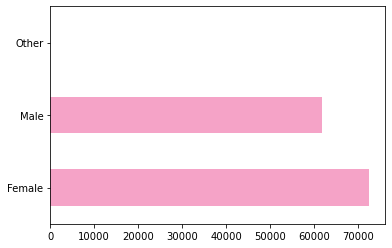

In [103]:
og_DF.Gender.value_counts().plot.barh(color='#F5A3C7')
plt.show()

In [104]:
og_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134283 entries, 0 to 134282
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Case Id                         134282 non-null  object 
 1   Createdon                       134283 non-null  object 
 2   Scheme/Doc                      134283 non-null  object 
 3   Scheme/Doc GUID                 134283 non-null  object 
 4   Status                          134283 non-null  object 
 5   Docket Submitted Date           123747 non-null  object 
 6   Benefit received Date           116170 non-null  object 
 7   HD Suspected Cases              134283 non-null  object 
 8   State                           134283 non-null  object 
 9   District                        134283 non-null  object 
 10  Citizen GUID                    134283 non-null  object 
 11  Citizen Name                    134283 non-null  object 
 12  Gender          

# Exporting original transformed data to excel.

In [105]:
# Notifying user to give consent..
notification = Notify()
notification.title = "Consent Required"
notification.message = "Hello Akash! Waiting for your consent."
notification.audio = "E:/Music/Ringtone/Consent required1.wav"
notification.send()

# Asking consent from user for original data export.
consent = input("Do you want to export original data? (Y/N)\n")

if consent in ["Y","y"]:
    if len(og_DF) > 1048576:
        for state in og_DF.State.value_counts().index.to_list():
            with pd.ExcelWriter('C:\\Python\\export\\'+state[0:3]+'_'+fn.split('_')[2]+' og_data.xlsx') as writer:            
                print(f"Exporting full {state} data.")
                og_DF[og_DF.State == state].to_excel(writer, sheet_name=state, index=False)
                rejectedDF[rejectedDF.State == state].to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting statewise rejected data
                #writer.close()
                print("Export to excel success!")
    else:
        with pd.ExcelWriter('C:\\Python\\export\\'+fn.split('_')[2]+'_'+fn.split('_')[3]+' og_data.xlsx') as writer:
            print(f"Exporting full data.")
            og_DF.to_excel(writer, sheet_name='Raw Data', index=False)
            rejectedDF.to_excel(writer, sheet_name='Abort_Rejected', index=False) # Exporting rejected data
            #writer.close()
            print("Export to excel success!")
else:
    print("You dont want original data!")

# Asking consent from user for original data export.
consent = input("Do you want to append LTPCT data? (Y/N)\n")

if consent in ["Y","y"]:
    # Asking consent from user for original data export.
    consent = input("Have you mapped indicators? (Y/N)\n")

    if consent in ["N","n"]:
        print("Cant proceed further unless indicator's mapped to the data. Kindly, comback after mapping the indicators!")
    elif consent in ["Y","y"]:
        # Asking for project file name from the user
        file_Name = input('Please enter file name = ')
        src = r"C:\Users\akash\Downloads"
        dest = "C:\\Python\\read\\"
        if file_Name in os.listdir(src):
            shutil.move(os.path.join(src,file_Name),os.path.join(dest,file_Name))

        ltpct = csvORexcel()

        #with pd.ExcelWriter(r'F:\Haqdarshak Data\LTPCT\Ahwa & Vikramgad\LTPCT (Ahwa, Vikramgad & Subir)_Monthly Dashboard.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
        #        ltpct.to_excel(writer, sheet_name='Schemes Data', index=False)
                #writer.close()
        #print("LTPCT (Ahwa, Vikramgad & Subir) Monthly Dashboard Updated!")
        with pd.ExcelWriter(r'F:\Haqdarshak Data\LTPCT\Phase 2\LTPCT P2 (Ahwa, Vikramgad & Subir)_Quarterly Dashboard.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
            print("Updating LTPCT P2 Quarterly Dashboard.")
            ltpct.to_excel(writer, sheet_name='Schemes Data', index=False)
        #with pd.ExcelWriter(r'F:\Haqdarshak Data\LTPCT\Phase 2\LTPCT P2 (Ahwa, Vikramgad & Subir)_Monthly Dashboard.xlsx', if_sheet_exists='replace', mode='a', engine='openpyxl') as writer:
        #    print("Updating LTPCT P2 Monthly Dashboard.")
        #    ltpct.to_excel(writer, sheet_name='Schemes Data', index=False)
                #writer.close()
        #print("LTPCT (Ahwa, Vikramgad & Subir) Quarterly & Monthly Dashboard Updated!")
    else:
        print("Abort!")

Do you want to export original data? (Y/N)
 N


You dont want original data!


Do you want to append LTPCT data? (Y/N)
 N


,Status,Total Application
2,Open,6784
1,Submitted,6979
0,Benefit Received,50568
3,Grand Total,64331


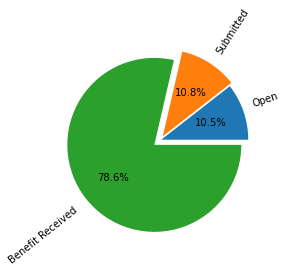

In [108]:
# Changing status values to O_S_BR
og_summary = pd.DataFrame(og_DF[og_DF['Scheme Category']=='E-Gov'].Status.value_counts())
og_summary.reset_index(inplace=True)
og_summary.rename(columns={'Status':'Total Application', 'index':'Status'}, inplace=True)
og_summary.loc[len(og_summary.index)] = ['Grand Total', og_summary['Total Application'].sum()]
try:
    og_summary = og_summary.iloc[[2,1,0,3]]
    plt.pie(og_summary['Total Application'][0:3], labels=og_summary['Status'][0:3], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05,0.09])
except IndexError:
    og_summary = og_summary.iloc[[1,0,2]]
    plt.pie(og_summary['Total Application'][0:2], labels=og_summary['Status'][0:2], rotatelabels=True, autopct="%1.1f%%", explode=[0.01,0.05])
og_summary

# Notifying user using Notification

In [109]:
notification.title = "Process Execution Alert"
notification.message = "Hello Akash! Python script execution has completed."
notification.audio = "E:/Music/Ringtone/Process Execution Alert.wav"
notification.send(block=False)
print('Script execution completed!')

Script execution completed!


# Delete Variables and clean the space

In [110]:
consent = input("Do you want to delete custom variables")
if consent in ['Y','y']:
    for name in globals():
        if not name.startswith(('__', '_')):  # Exclude built-in names like __name__, __doc__ etc.
            del name
            print(f"Deleted the {name} variable")

Do you want to delete custom variables N
